# Expectation Maximization Clustering

"The K-means approach is an example of a hard assignment clustering, where each point can belong to only one cluster. Expectation-Maximization algorithm is a way to generalize the approach to consider the soft assignment of points to clusters so that each point has a probability of belonging to each cluster."

"Maximum likelihood estimation is an approach to density estimation for a dataset by searching across probability distributions and their parameters.

It is a general and effective approach that underlies many machine learning algorithms, although it requires that the training dataset is complete, e.g. all relevant interacting random variables are present. Maximum likelihood becomes intractable if there are variables that interact with those in the dataset but were hidden or not observed, so-called latent variables.

The expectation-maximization algorithm is an approach for performing maximum likelihood estimation in the presence of latent variables. It does this by first estimating the values for the latent variables, then optimizing the model, then repeating these two steps until convergence. It is an effective and general approach and is most commonly used for density estimation with missing data, such as clustering algorithms like the Gaussian Mixture Model."

## Heart Failure Prediction Dataset - Standardized

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
import random

In [2]:
data: pd.DataFrame = pd.read_csv('../../datasets/hf_scaled/HF_standardized.csv')
data.pop('DEATH_EVENT') #Remove target variable

N_CLUSTERS = [2, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 30]
rows, cols = (11,6)

K - 2
K - 3
K - 5
K - 7
K - 9
K - 11
K - 13
K - 15
K - 17
K - 19
K - 21
K - 23
K - 25
K - 27
K - 29
K - 30


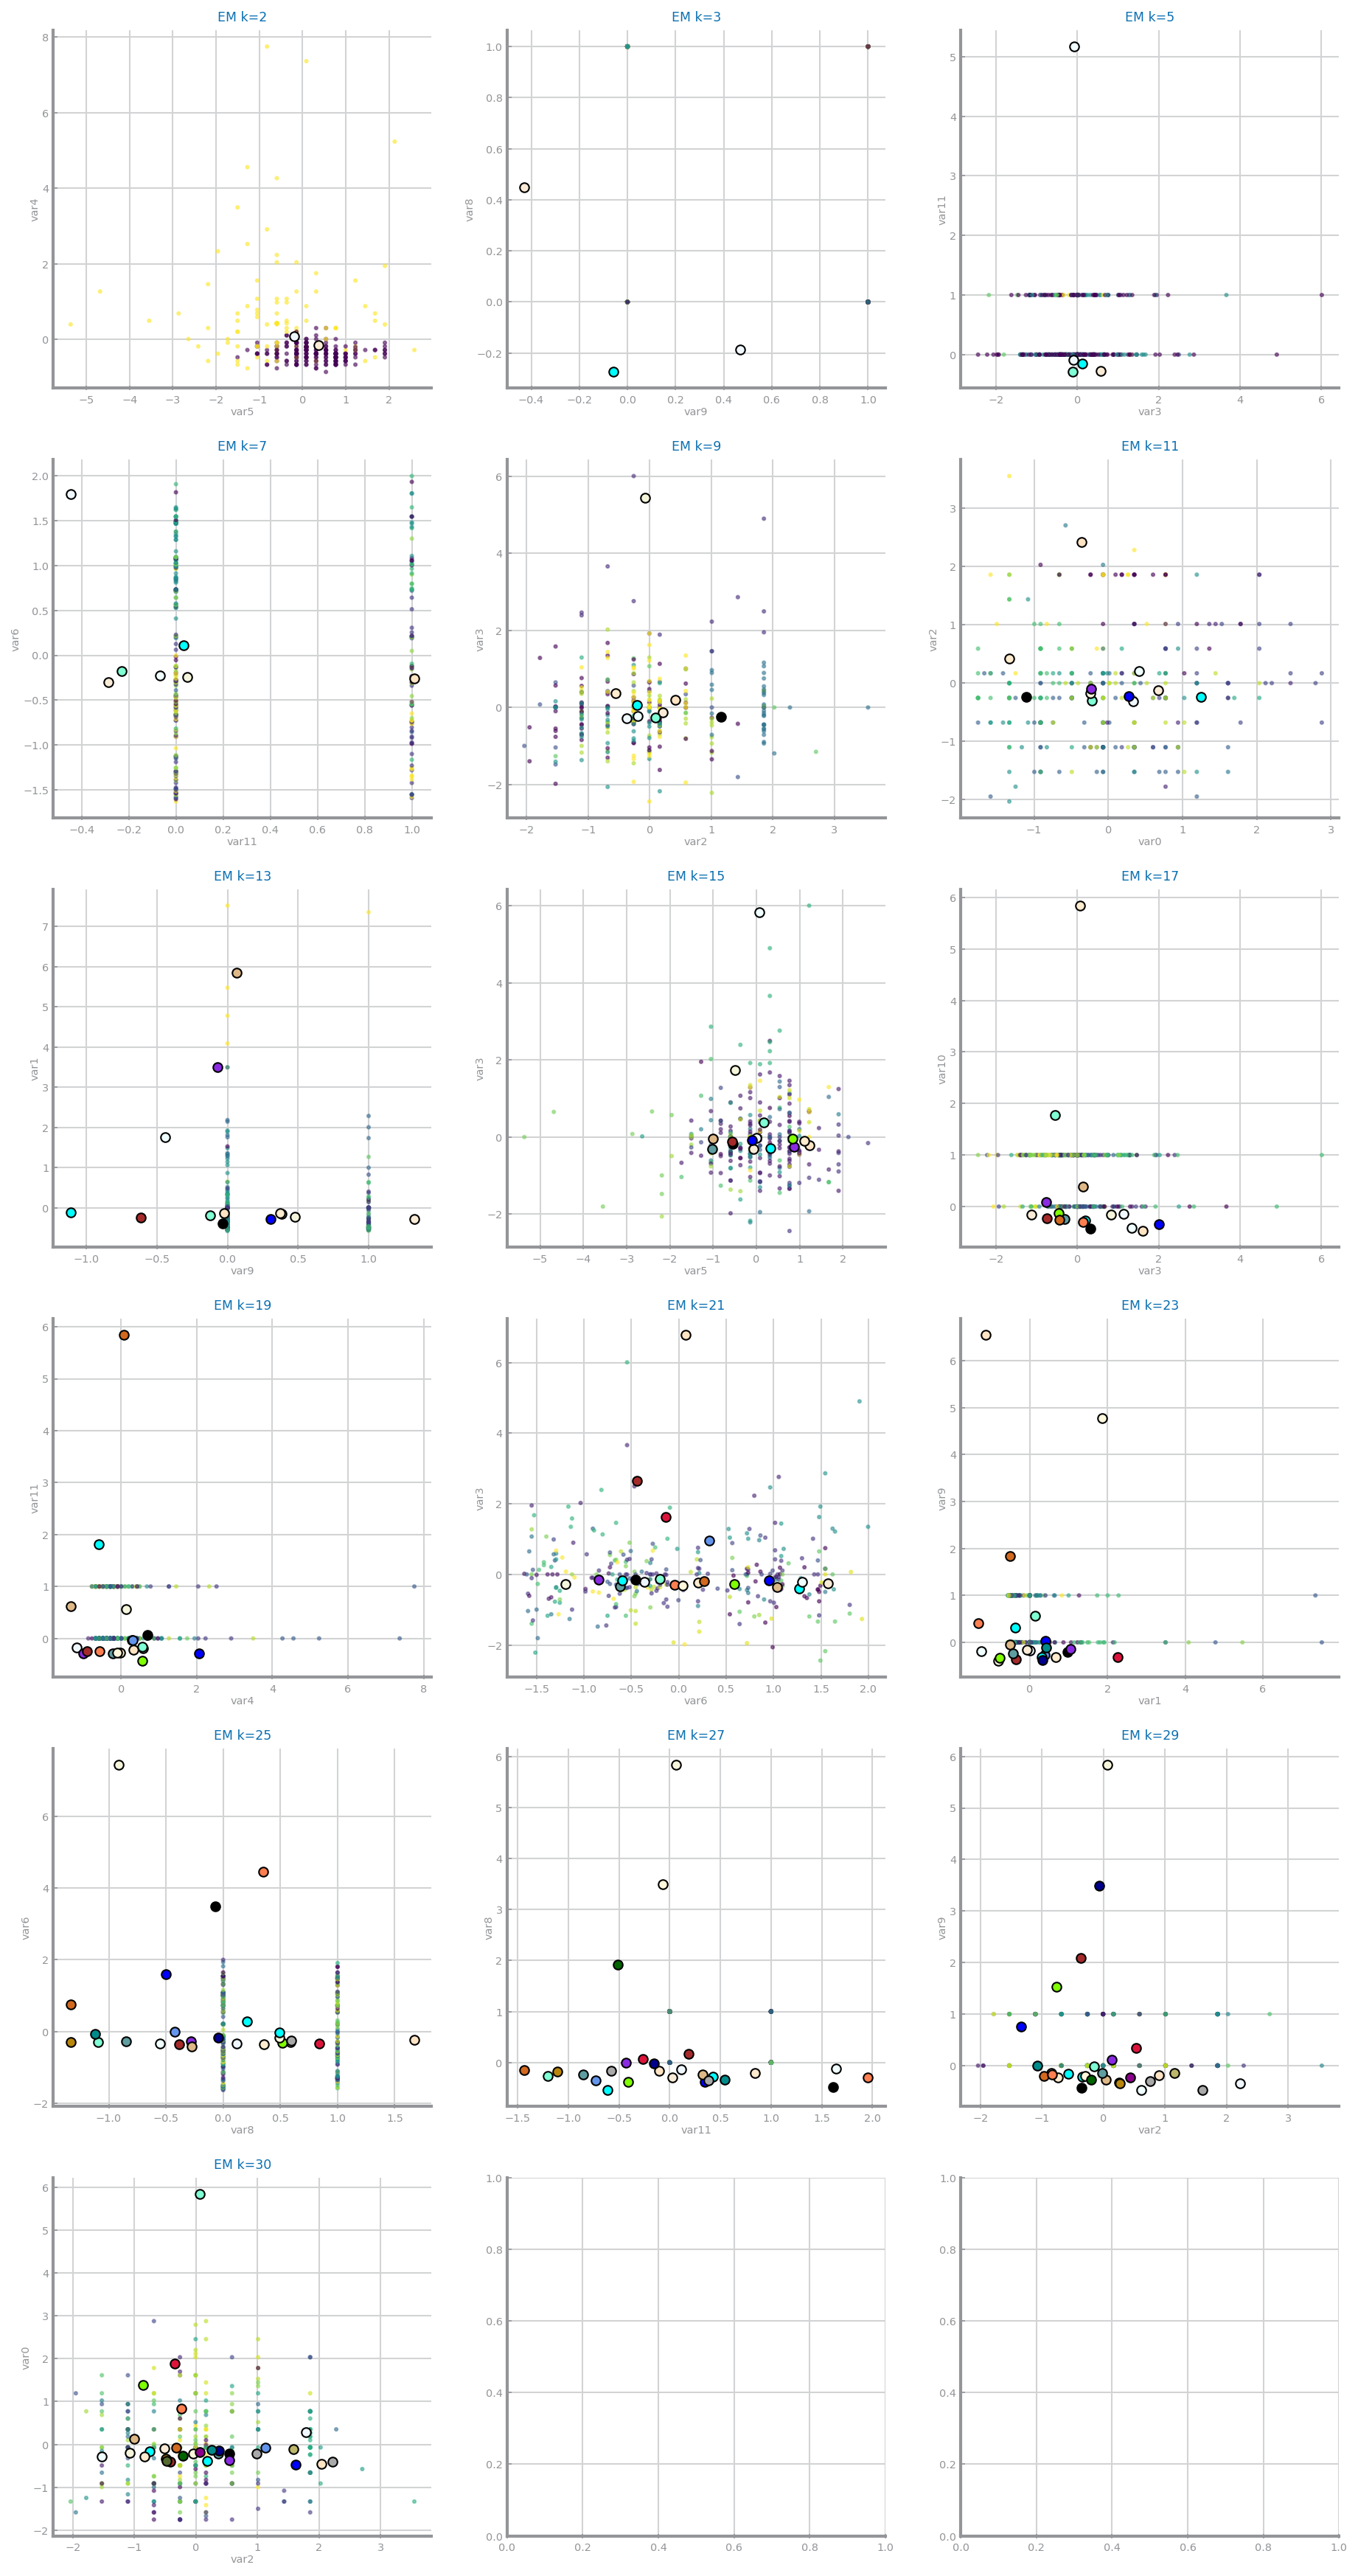

In [3]:
mse: list = []
sc: list = []
db: list = []
    
'''
for n in range(len(N_CLUSTERS)):
    fig, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
    i, j = 0, 0
    
    k = N_CLUSTERS[n]
    estimator = GaussianMixture(n_components=k)
    estimator.fit(data)
    labels = estimator.predict(data)
    
    mse.append(ds.compute_mse(data.values, labels, estimator.means_))
    sc.append(silhouette_score(data, labels))
    db.append(davies_bouldin_score(data, labels))
    
    print("K - " + str(n))
    
    for f1 in range (len(data.columns)):
        for f2 in range(f1+1, len(data.columns)): 
            ds.plot_clusters(data, f2, f1, labels.astype(float), estimator.means_, k,
                     f'EM k={k}', ax=axs[i,j])
            
            i, j = (i + 1, 0) if (j+1) % cols == 0 else (i, j + 1)    
    plt.show()
'''

rows, cols = ds.choose_grid(len(N_CLUSTERS))    
fig, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
i, j = 0, 0
for n in range(len(N_CLUSTERS)):
    k = N_CLUSTERS[n]
    
    print("K - " + str(k))

    estimator = GaussianMixture(n_components=k)
    estimator.fit(data)
    labels = estimator.predict(data)
    
    mse.append(ds.compute_mse(data.values, labels, estimator.means_))
    sc.append(silhouette_score(data, labels))
    db.append(davies_bouldin_score(data, labels))

    
    v1 = random.randint(0, len(data.columns)-1) # Random v1
    v2 = random.randint(0, len(data.columns)-1) # Random v2
    while(v1 == v2):
        v2 = random.randint(0, len(data.columns)-1)
    
    ds.plot_clusters(data, v2, v1, labels.astype(float), estimator.means_, k,
                     f'EM k={k}', ax=axs[i,j])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

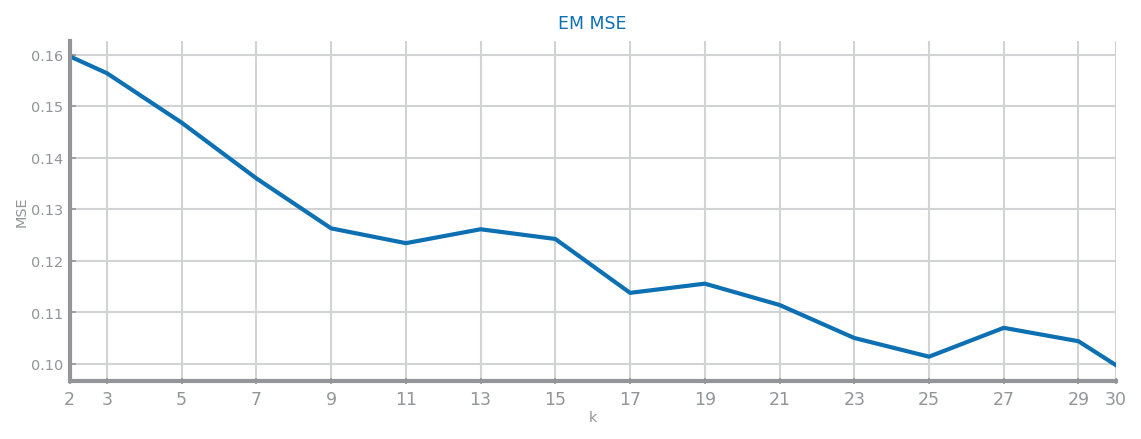

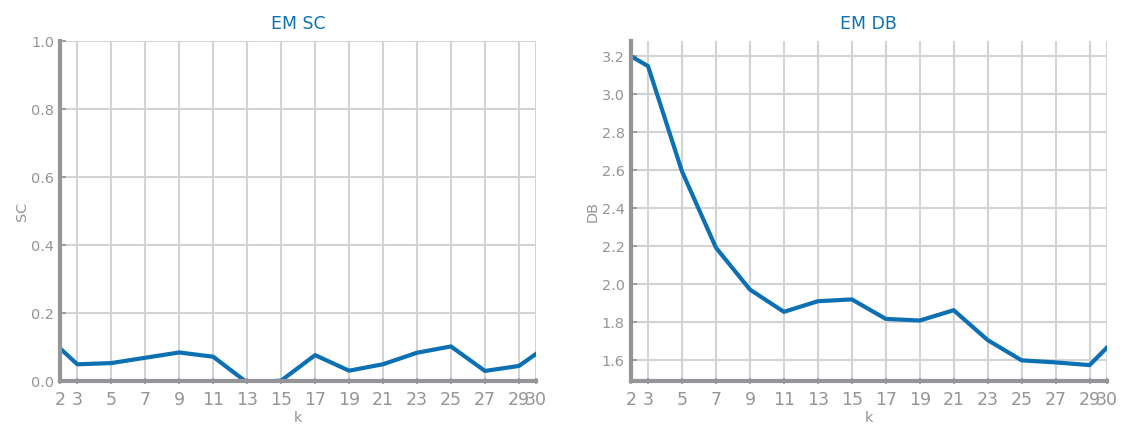

In [4]:
fig = plt.figure(figsize=(9,3))
ds.plot_line(N_CLUSTERS, mse, title='EM MSE', xlabel='k', ylabel='MSE')
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(9, 3), squeeze=False)
ds.plot_line(N_CLUSTERS, sc, title='EM SC', xlabel='k', ylabel='SC', ax=ax[0, 0], percentage=True)
ds.plot_line(N_CLUSTERS, db, title='EM DB', xlabel='k', ylabel='DB', ax=ax[0, 1], percentage=False)
plt.show()

"
Gaussian distributions are continuous distributions.

There is no meaningful way to apply this famous "bell shaped curve" onto categorical data - binary encoding clearly does not make sense either. You have to find something else to use instead of Gaussians...

So instead of hacking to make your data fake Gaussian, you should rather make the algorithm match your data and problem.
"

### K-Means No Binary Data

In [5]:
data: pd.DataFrame = pd.read_csv('../../datasets/hf_scaled/HF_standardized.csv')
data.pop('DEATH_EVENT') #Remove target variable
numeric_vars = data.select_dtypes(include='number').columns

numeric_data = data
binary_data = data

for n in range(len(numeric_vars)):
    num_unique = len(list(set(data[numeric_vars[n]].values)))
    if num_unique == 2:
        numeric_data = numeric_data.drop(columns=[data.columns[n]], axis=1) #Remove binary columns

    else:
        binary_data = binary_data.drop(columns=[data.columns[n]], axis=1) #Remove non-binary columns

print(numeric_data.head())
data = numeric_data

N_CLUSTERS = [2, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 30]
rows, cols = (6,4)

        age  creatinine_phosphokinase  ejection_fraction     platelets  \
0  1.192945                  0.000166          -1.530560  1.681648e-02   
1 -0.491279                  7.514640          -0.007077  7.535660e-09   
2  0.350833                 -0.449939          -1.530560 -1.038073e+00   
3 -0.912335                 -0.486071          -1.530560 -5.464741e-01   
4  0.350833                 -0.435486          -1.530560  6.517986e-01   

   serum_creatinine  serum_sodium      time  
0          0.490057     -1.504036 -1.629502  
1         -0.284552     -0.141976 -1.603691  
2         -0.090900     -1.731046 -1.590785  
3          0.490057      0.085034 -1.590785  
4          1.264666     -4.682176 -1.577879  


K - 2
K - 3
K - 5
K - 7
K - 9
K - 11
K - 13
K - 15
K - 17
K - 19
K - 21
K - 23
K - 25
K - 27
K - 29
K - 30


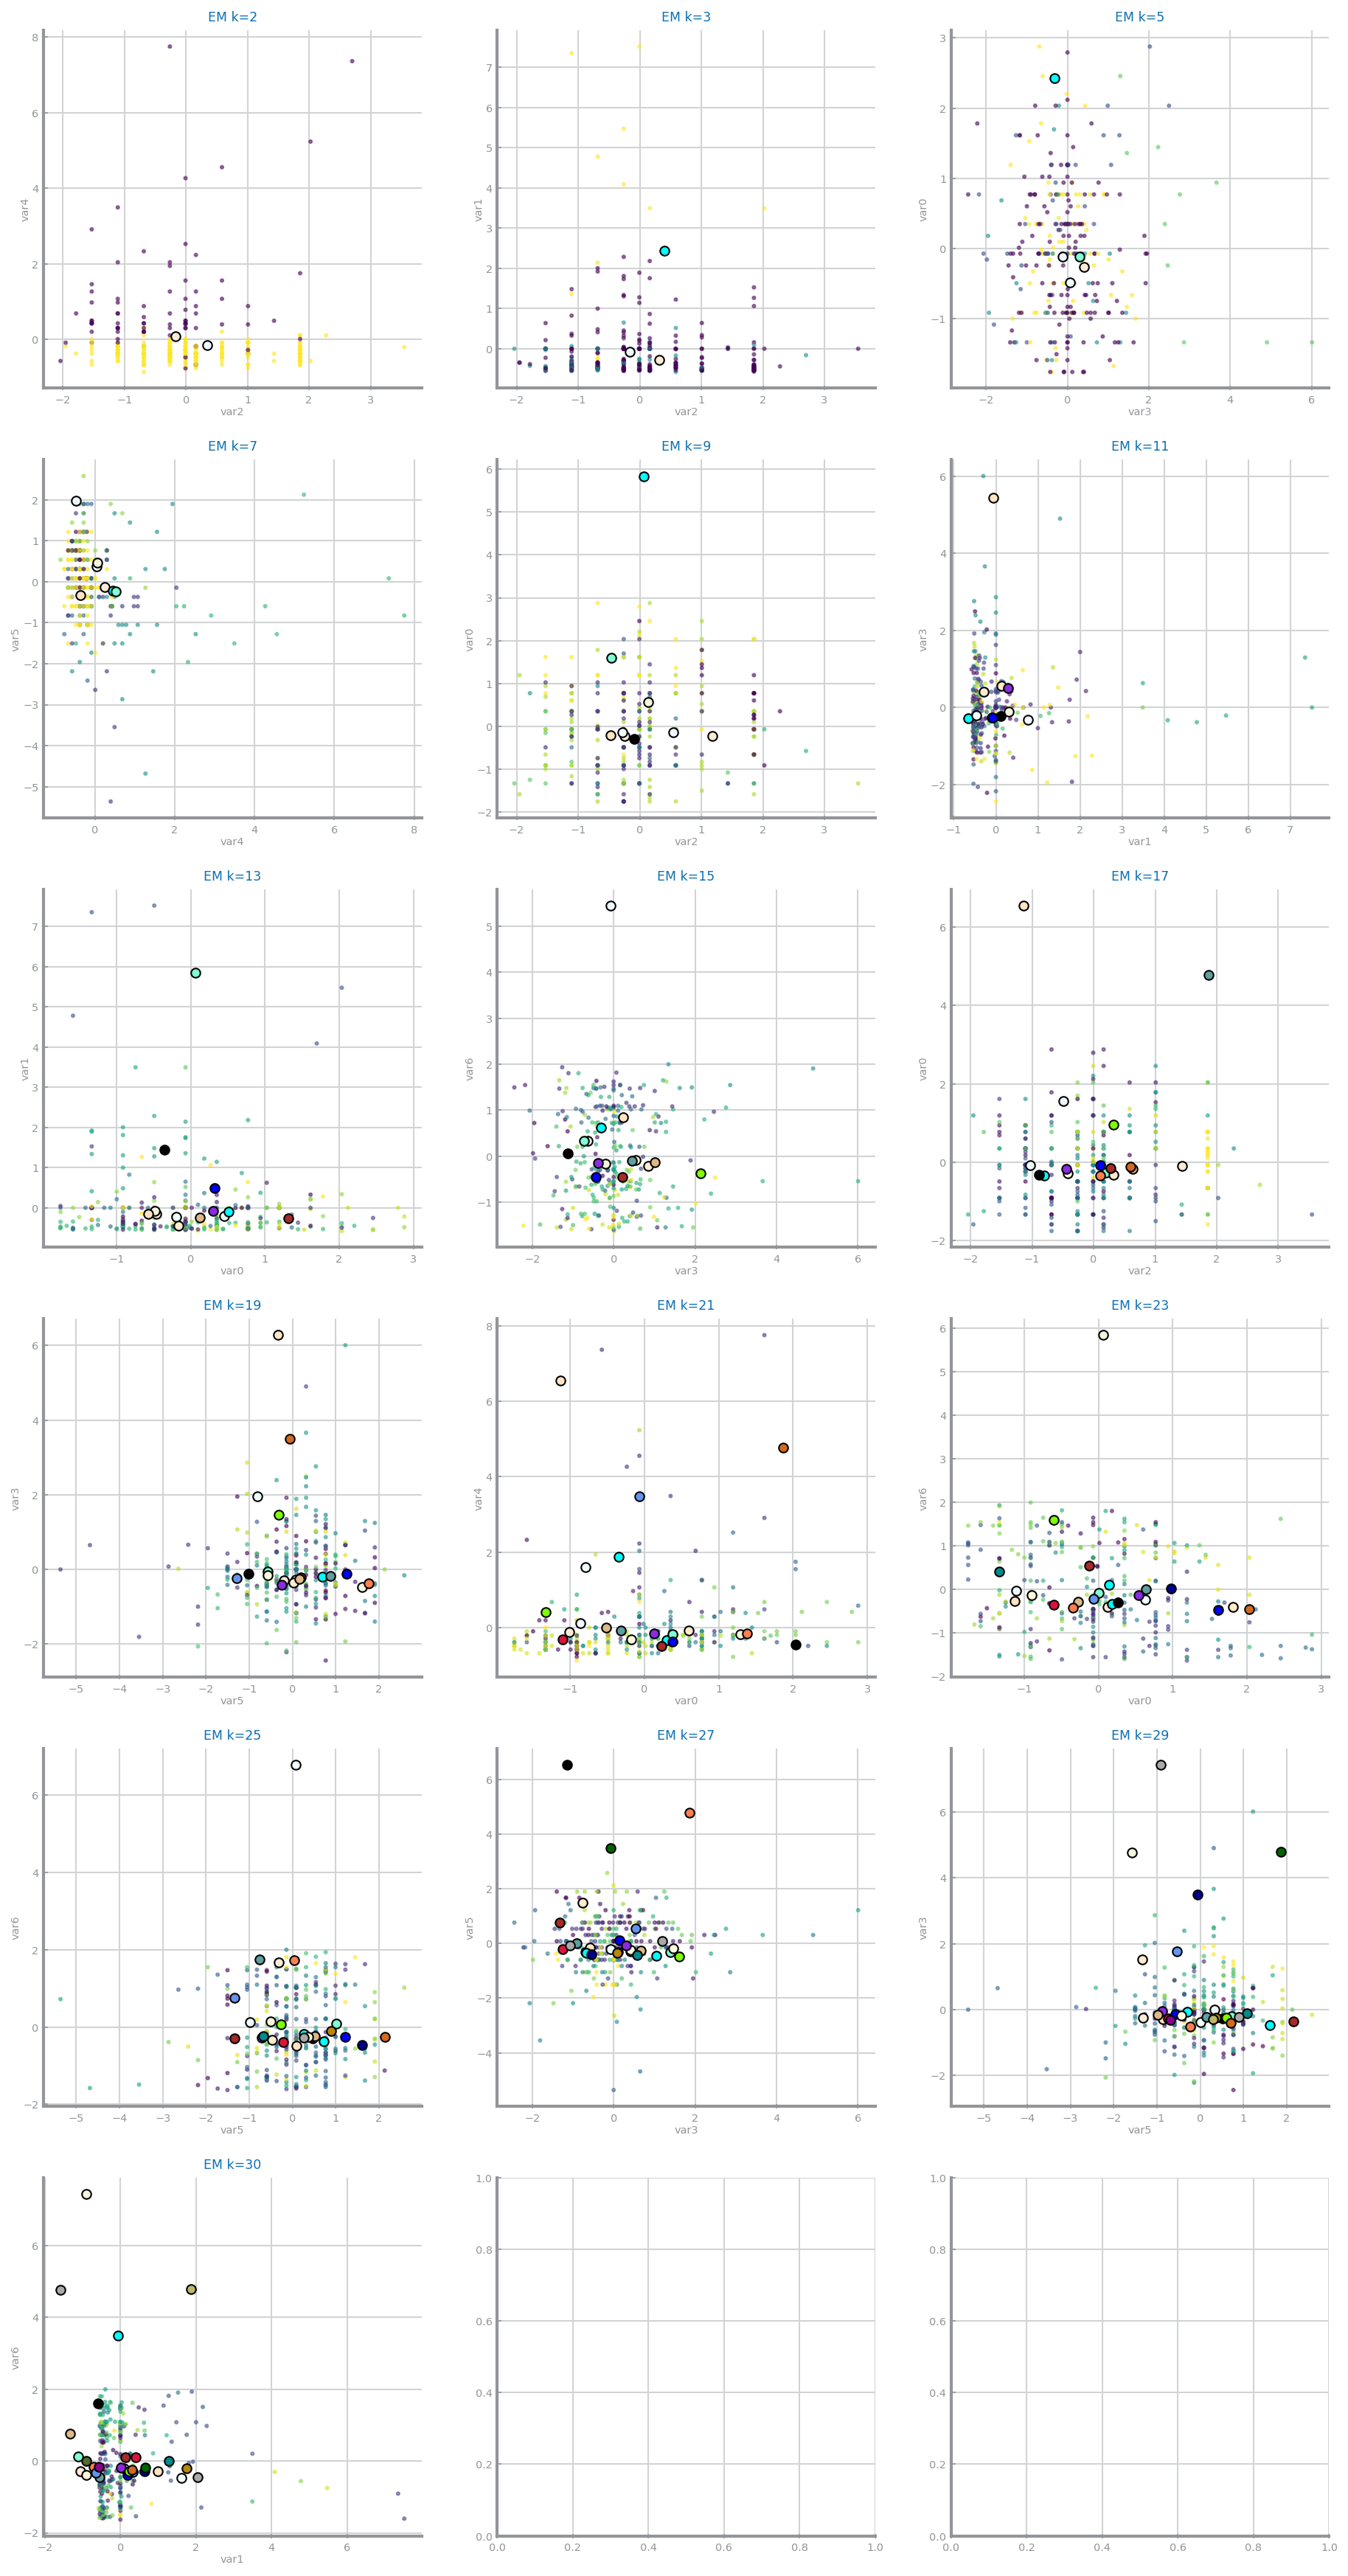

In [6]:
mse: list = []
sc: list = []
db: list = []
    
'''
for n in range(len(N_CLUSTERS)):
    fig, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
    i, j = 0, 0
    
    k = N_CLUSTERS[n]
    estimator = GaussianMixture(n_components=k)
    estimator.fit(data)
    labels = estimator.predict(data)
    
    mse.append(ds.compute_mse(data.values, labels, estimator.means_))
    sc.append(silhouette_score(data, labels))
    db.append(davies_bouldin_score(data, labels))
    
    print("K - " + str(n))
    
    for f1 in range (len(data.columns)):
        for f2 in range(f1+1, len(data.columns)): 
            ds.plot_clusters(data, f2, f1, labels.astype(float), estimator.means_, k,
                     f'EM k={k}', ax=axs[i,j])
            
            i, j = (i + 1, 0) if (j+1) % cols == 0 else (i, j + 1)    
    plt.show()
'''

rows, cols = ds.choose_grid(len(N_CLUSTERS))    
fig, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
i, j = 0, 0
for n in range(len(N_CLUSTERS)):
    k = N_CLUSTERS[n]
    
    print("K - " + str(k))

    estimator = GaussianMixture(n_components=k)
    estimator.fit(data)
    labels = estimator.predict(data)
    
    mse.append(ds.compute_mse(data.values, labels, estimator.means_))
    sc.append(silhouette_score(data, labels))
    db.append(davies_bouldin_score(data, labels))

    
    v1 = random.randint(0, len(data.columns)-1) # Random v1
    v2 = random.randint(0, len(data.columns)-1) # Random v2
    while(v1 == v2):
        v2 = random.randint(0, len(data.columns)-1)
    
    ds.plot_clusters(data, v2, v1, labels.astype(float), estimator.means_, k,
                     f'EM k={k}', ax=axs[i,j])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

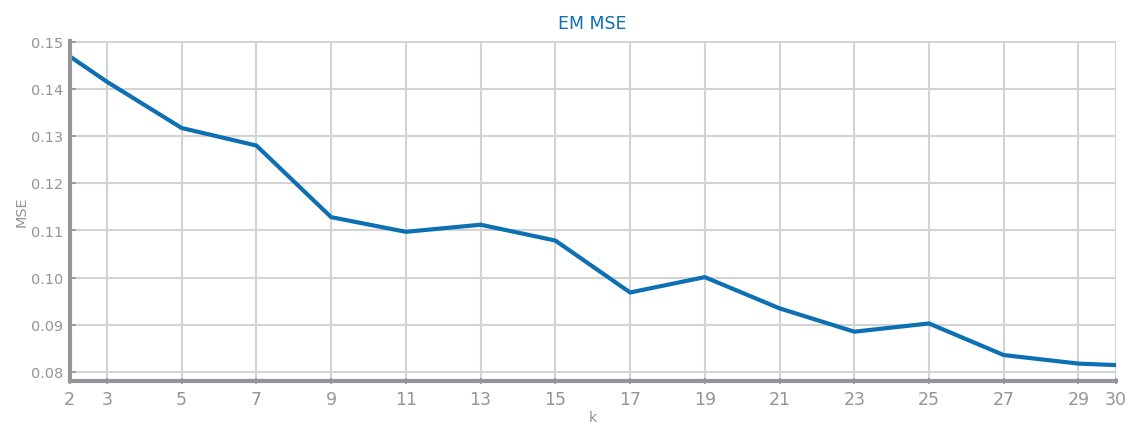

[2.7693941076048327, 2.3448749594689327, 2.2567852404006046, 2.2605586074401307, 1.6033610404482572, 1.9983920568212206, 1.9737799139379282, 1.9129055092007, 1.5640121649765435, 1.670063666004459, 1.4546789335113783, 1.48584197760091, 1.5022260469051723, 1.2414848781964514, 1.3636973630162734, 1.3042757169470585]


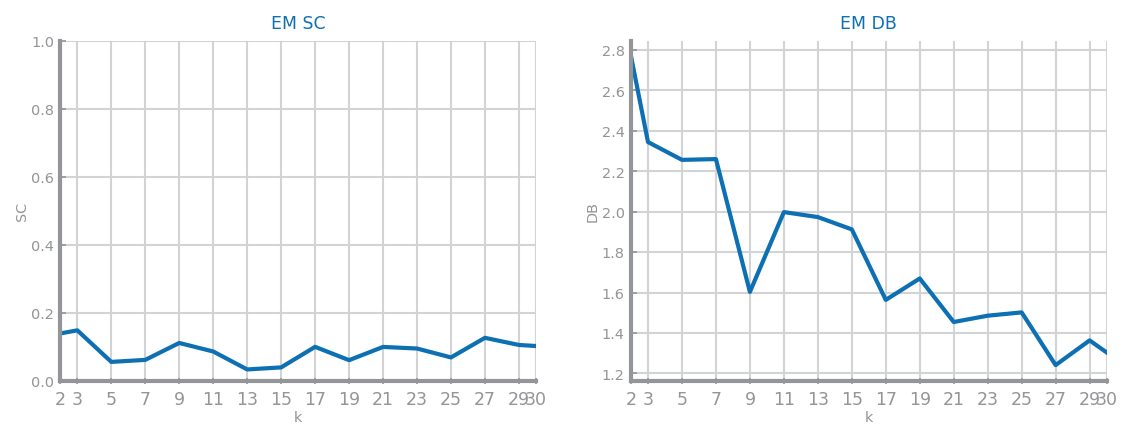

In [7]:
fig = plt.figure(figsize=(9,3))
ds.plot_line(N_CLUSTERS, mse, title='EM MSE', xlabel='k', ylabel='MSE')
plt.show()

print(db)

fig, ax = plt.subplots(1, 2, figsize=(9, 3), squeeze=False)
ds.plot_line(N_CLUSTERS, sc, title='EM SC', xlabel='k', ylabel='SC', ax=ax[0, 0], percentage=True)
ds.plot_line(N_CLUSTERS, db, title='EM DB', xlabel='k', ylabel='DB', ax=ax[0, 1], percentage=False)
plt.show()

<br/>
<br/>
<br/>
<br/>
<br/>

## Heart Failure Prediction Dataset - Standardized + ANOVA + FG + Outlier

### Imports

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import ds_functions as ds
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [11]:
data: pd.DataFrame = pd.read_csv('../../datasets/TO_TEST/HF/HF_S_FAnova_extra_outlierTrim_IQS.csv')
data.pop('DEATH_EVENT') #Remove target variable

N_CLUSTERS = [2, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 30]
rows, cols = (10,6)

K - 2
K - 3
K - 5
K - 7
K - 9
K - 11
K - 13
K - 15
K - 17
K - 19
K - 21
K - 23
K - 25
K - 27
K - 29
K - 30


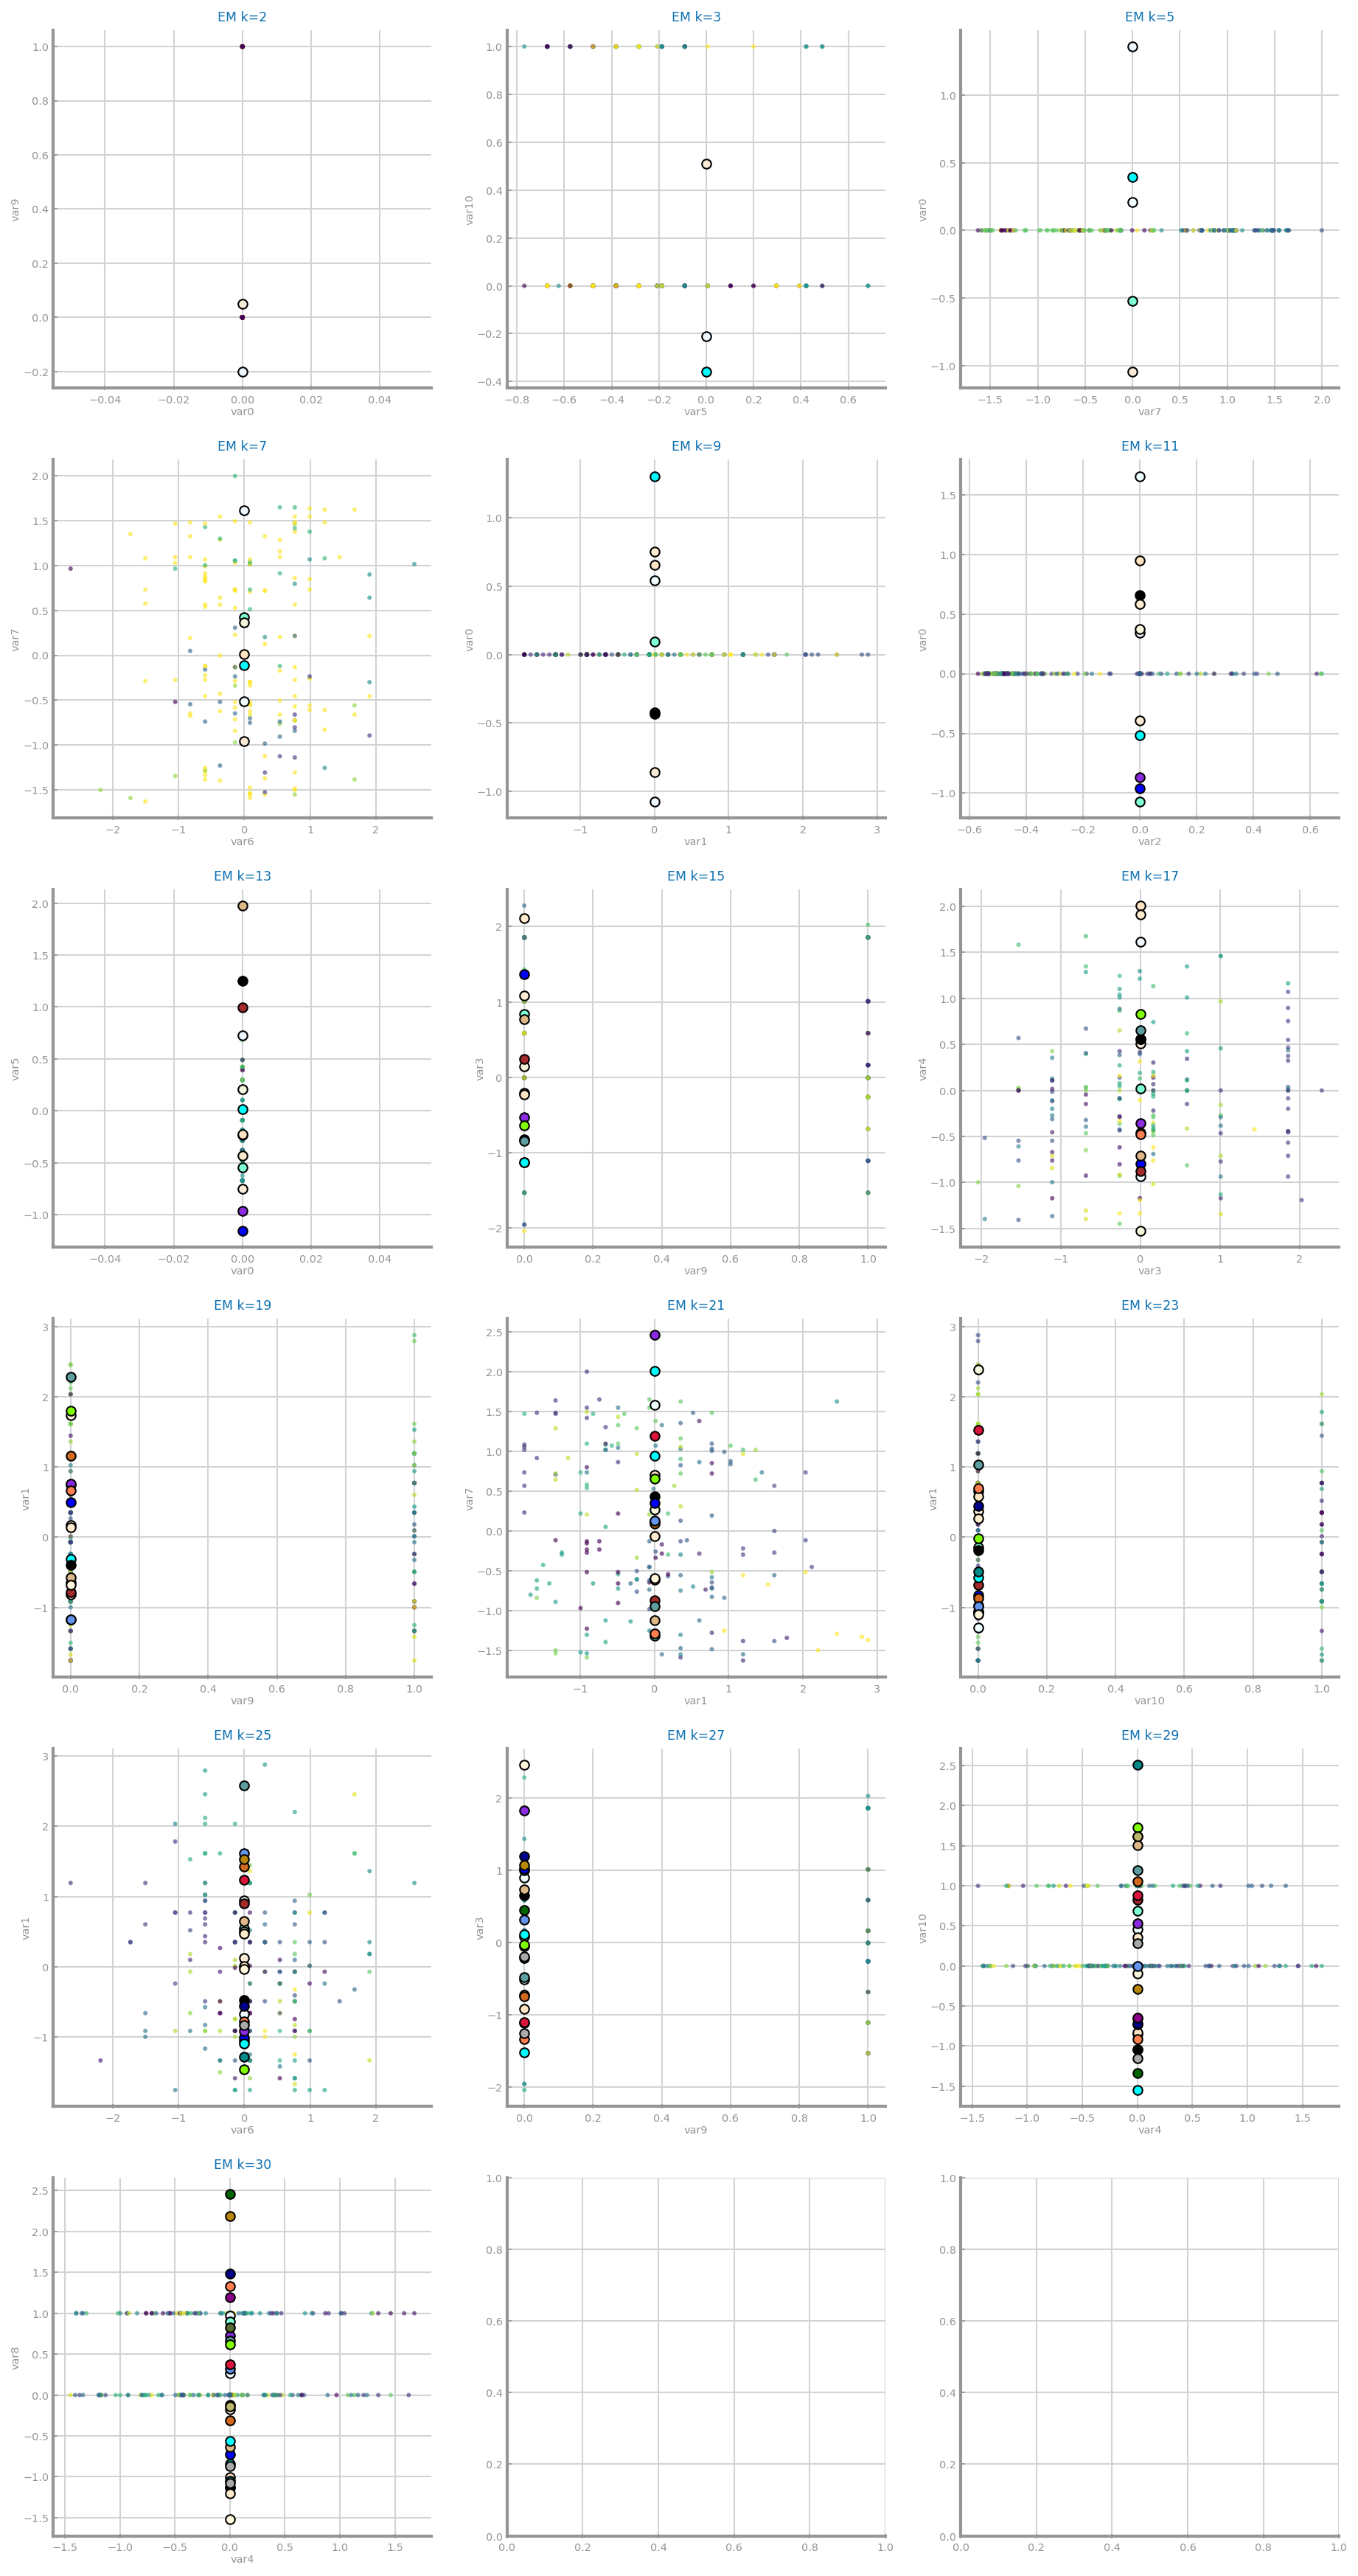

In [12]:
mse: list = []
sc: list = []
db: list = []

'''
for n in range(len(N_CLUSTERS)):
    fig, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
    i, j = 0, 0
    
    k = N_CLUSTERS[n]
    estimator = GaussianMixture(n_components=k)
    estimator.fit(data)
    labels = estimator.predict(data)
    
    mse.append(ds.compute_mse(data.values, labels, estimator.means_))
    sc.append(silhouette_score(data, labels))
    db.append(davies_bouldin_score(data, labels))
    
    print("K - " + str(n))
    
    for f1 in range (len(data.columns)):
        for f2 in range(f1+1, len(data.columns)): 
            ds.plot_clusters(data, f2, f1, labels.astype(float), estimator.means_, k,
                     f'EM k={k}', ax=axs[i,j])
            
            i, j = (i + 1, 0) if (j+1) % cols == 0 else (i, j + 1)    
    plt.show()
'''
rows, cols = ds.choose_grid(len(N_CLUSTERS))    
fig, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
i, j = 0, 0
for n in range(len(N_CLUSTERS)):
    k = N_CLUSTERS[n]
    
    print("K - " + str(k))

    estimator = GaussianMixture(n_components=k)
    estimator.fit(data)
    labels = estimator.predict(data)
    
    mse.append(ds.compute_mse(data.values, labels, estimator.means_))
    sc.append(silhouette_score(data, labels))
    db.append(davies_bouldin_score(data, labels))

    
    v1 = random.randint(0, len(data.columns)-1) # Random v1
    v2 = random.randint(0, len(data.columns)-1) # Random v2
    while(v1 == v2):
        v2 = random.randint(0, len(data.columns)-1)
    
    ds.plot_clusters(data, v2, v1, labels.astype(float), estimator.means_, k,
                     f'EM k={k}', ax=axs[i,j])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

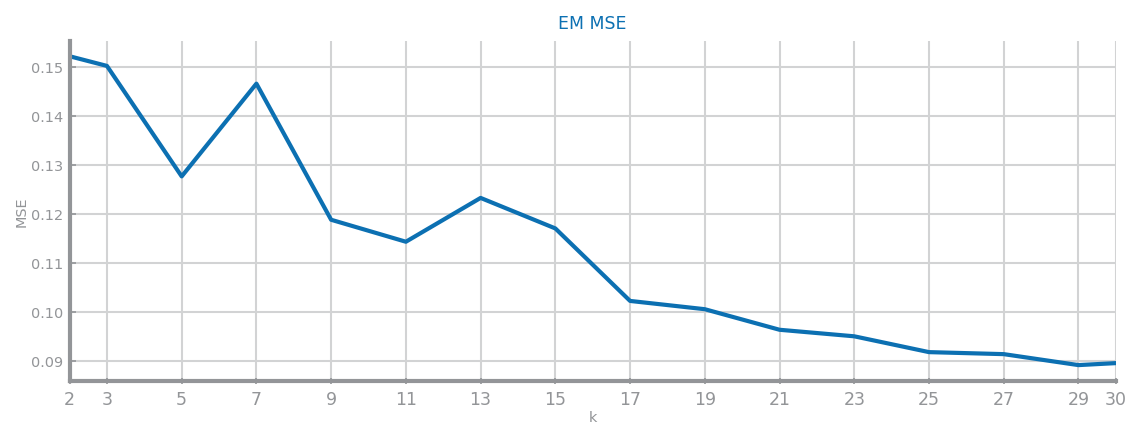

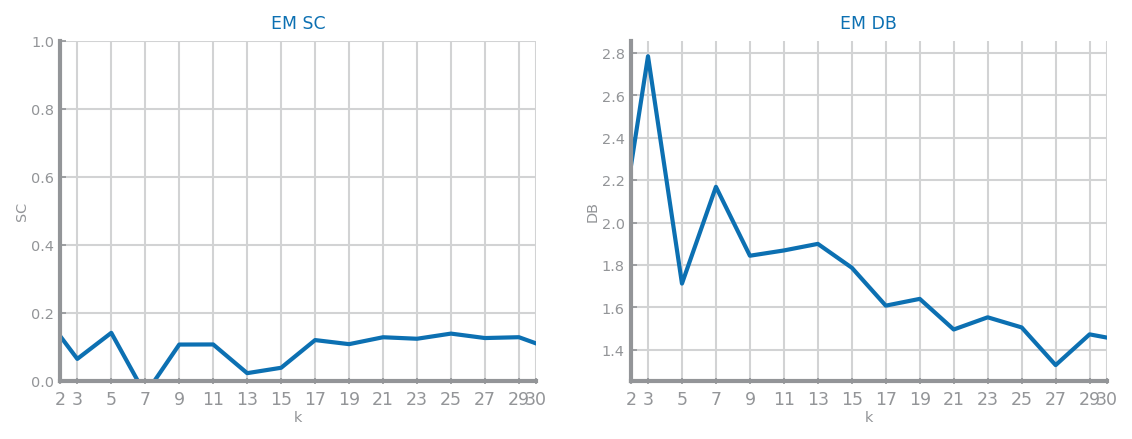

In [13]:
fig = plt.figure(figsize=(9,3))
ds.plot_line(N_CLUSTERS, mse, title='EM MSE', xlabel='k', ylabel='MSE')
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(9, 3), squeeze=False)
ds.plot_line(N_CLUSTERS, sc, title='EM SC', xlabel='k', ylabel='SC', ax=ax[0, 0], percentage=True)
ds.plot_line(N_CLUSTERS, db, title='EM DB', xlabel='k', ylabel='DB', ax=ax[0, 1], percentage=False)
plt.show()

"Yes, it is unlikely that binary data can be clustered satisfactorily. To see why, consider what happens as the K-Means algorithm processes cases.

For binary data, the Euclidean distance measure used by K-Means reduces to counting the number of variables on which two cases disagree. After the initial centers are chosen (which depends on the order of the cases), the centers are still binary data. For the first iteration, as the cases are compared to cluster means, they will always be at some integer distance from each of the centers. There will often be ties, and the case will be assigned to a cluster in an arbitrary manner. Using Euclidean distance (the only measure available to K-Means), it is impossible to overcome the symmetry and break the ties in any meaningful way.
"

### K-Means No Binary Data

In [14]:
data: pd.DataFrame = pd.read_csv('../../datasets/TO_TEST/HF/HF_S_FAnova_extra_outlierTrim_IQS_B.csv')
data.pop('DEATH_EVENT') #Remove target variable
numeric_vars = data.select_dtypes(include='number').columns

numeric_data = data
binary_data = data

for n in range(len(numeric_vars)):
    num_unique = len(list(set(data[numeric_vars[n]].values)))
    if num_unique == 2 or num_unique == 1:
        numeric_data = numeric_data.drop(columns=[data.columns[n]], axis=1) #Remove binary columns
    else:
        binary_data = binary_data.drop(columns=[data.columns[n]], axis=1) #Remove non-binary columns

print(numeric_data.head())
data = numeric_data

N_CLUSTERS = [2, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 30]
rows, cols = (6,4)

        age  creatinine_phosphokinase  ejection_fraction     platelets  \
0  1.192945                  0.000166          -1.530560  1.681648e-02   
1  0.350833                 -0.449939          -1.530560 -1.038073e+00   
2 -0.912335                 -0.486071          -1.530560 -5.464741e-01   
3  1.192945                 -0.346704          -1.953749 -1.396531e+00   
4  0.350833                 -0.438583           2.278147  7.535660e-09   

   serum_creatinine  serum_sodium      time  
0          0.490057     -1.504036 -1.629502  
1         -0.090900     -1.731046 -1.590785  
2          0.490057      0.085034 -1.590785  
3         -0.187726      0.085034 -1.552067  
4          0.102752      0.312044 -1.552067  


K - 2
K - 3
K - 5
K - 7
K - 9
K - 11
K - 13
K - 15
K - 17
K - 19
K - 21
K - 23
K - 25
K - 27
K - 29
K - 30


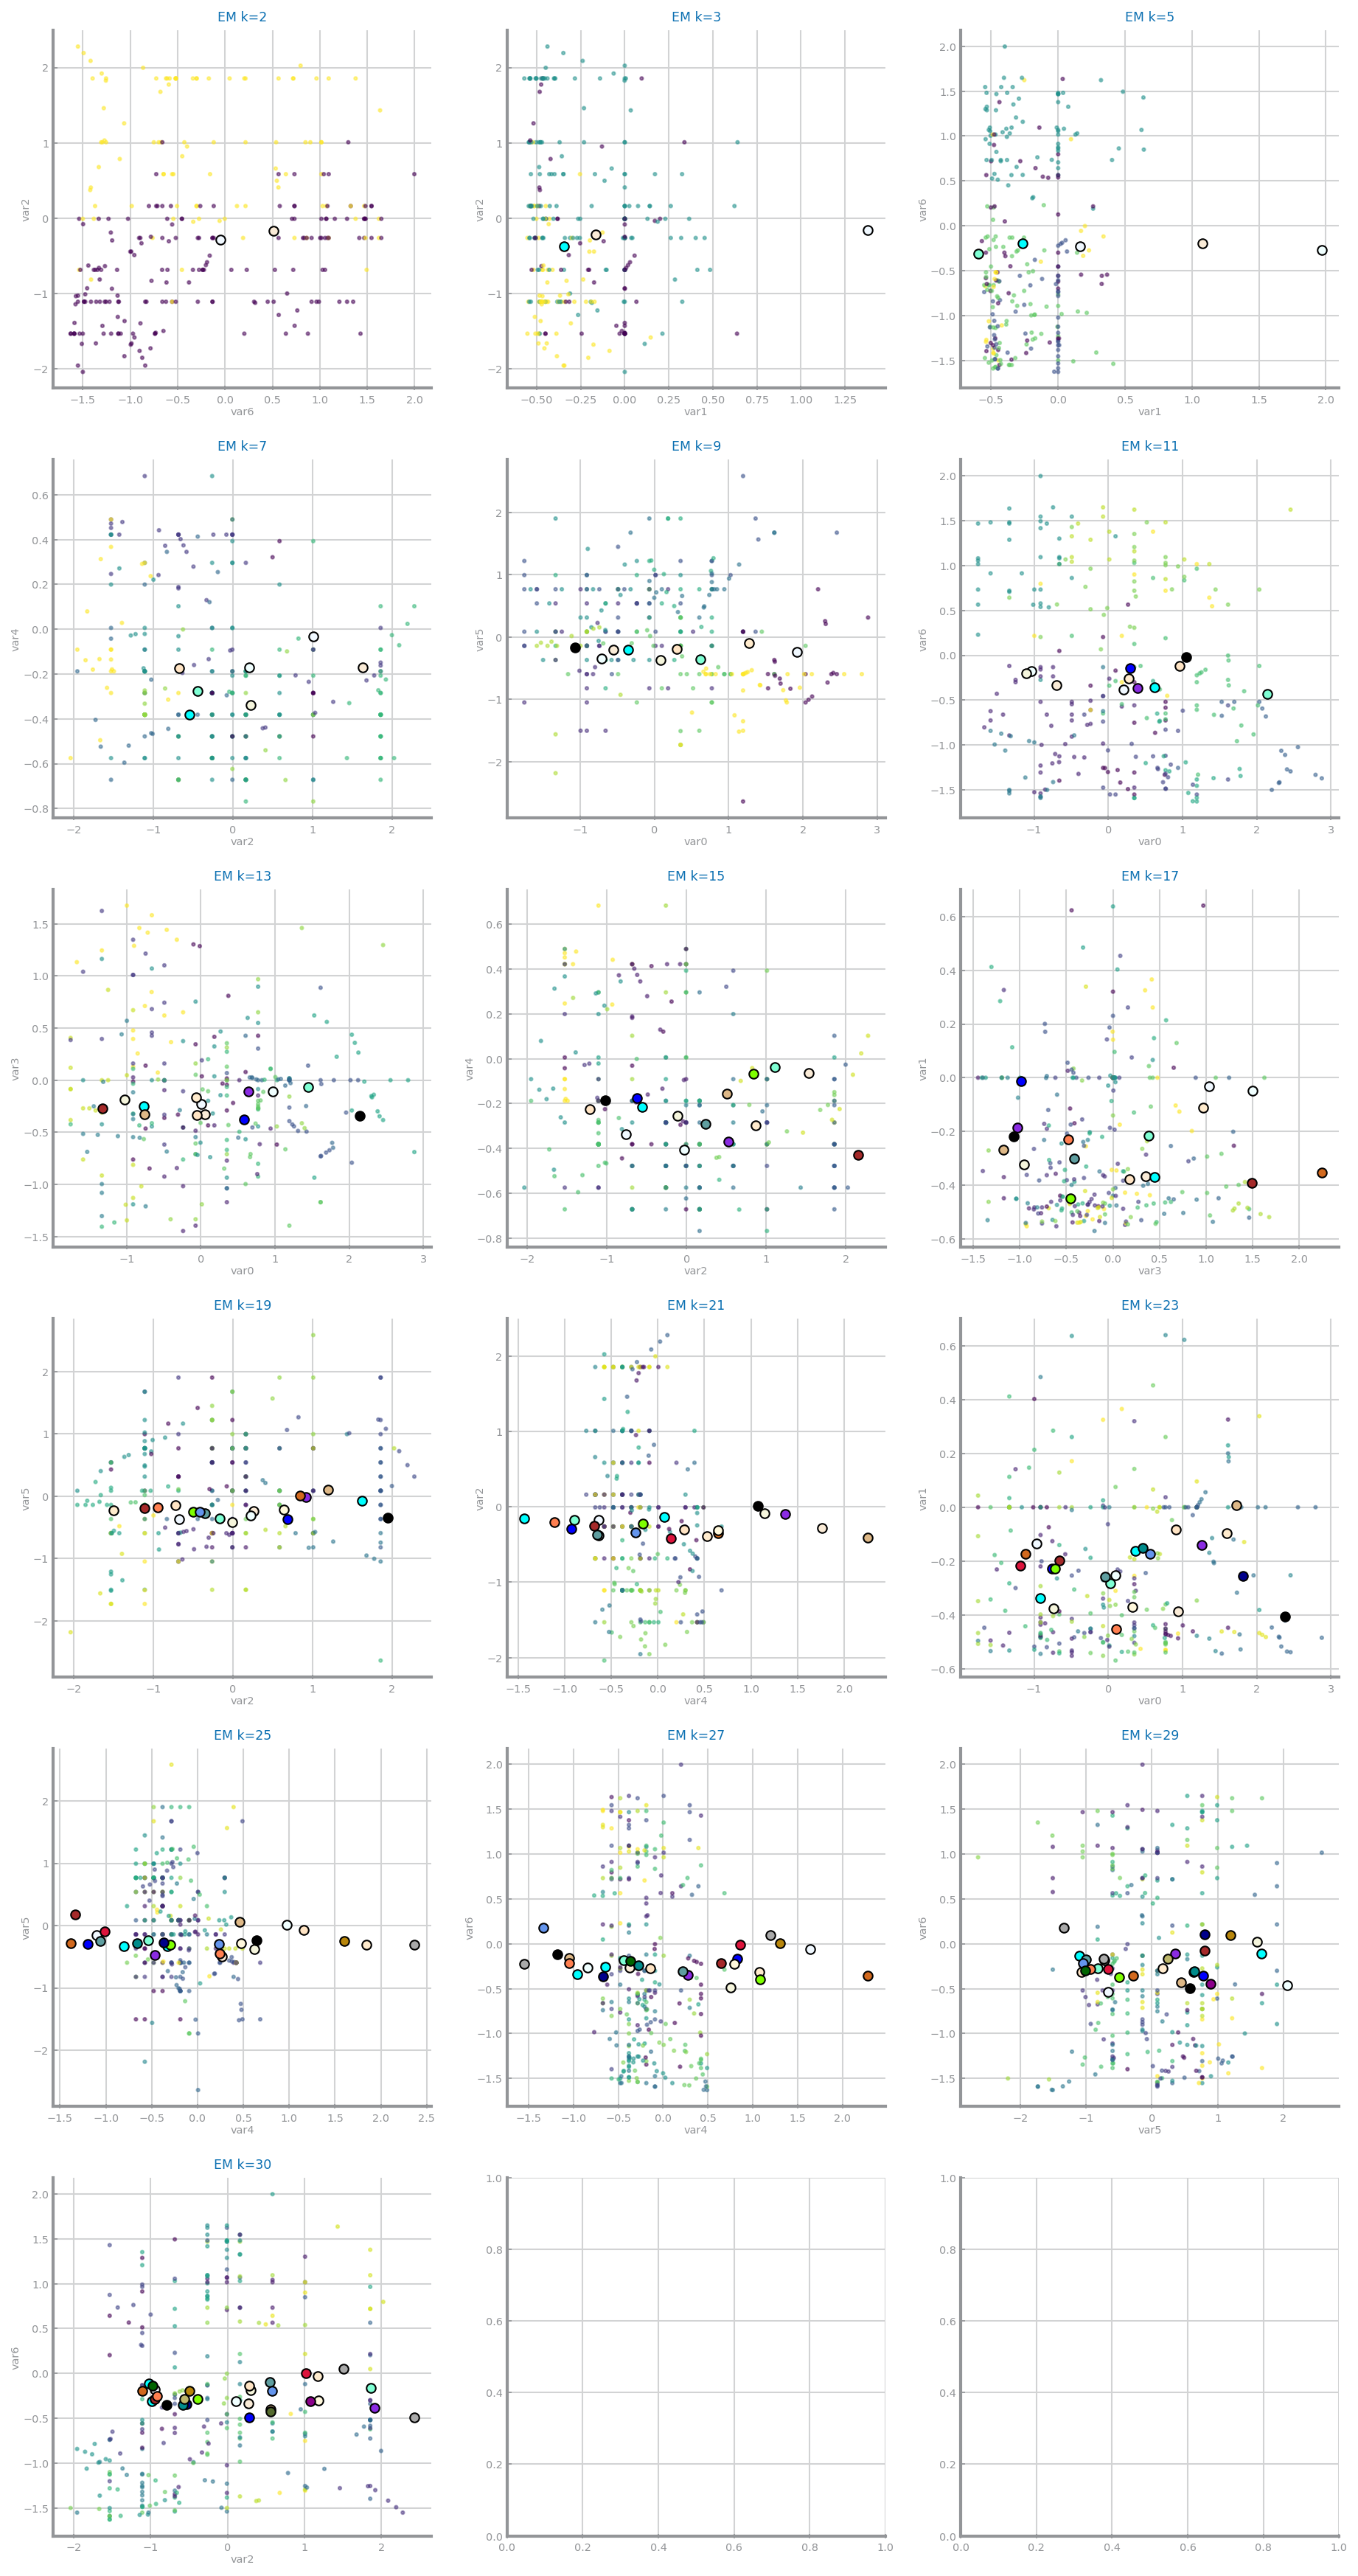

In [15]:
mse: list = []
sc: list = []
db: list = []
    
'''
for n in range(len(N_CLUSTERS)):
    fig, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
    i, j = 0, 0
    
    k = N_CLUSTERS[n]
    estimator = GaussianMixture(n_components=k)
    estimator.fit(data)
    labels = estimator.predict(data)
    
    mse.append(ds.compute_mse(data.values, labels, estimator.means_))
    sc.append(silhouette_score(data, labels))
    db.append(davies_bouldin_score(data, labels))
    
    print("K - " + str(n))
    
    for f1 in range (len(data.columns)):
        for f2 in range(f1+1, len(data.columns)): 
            ds.plot_clusters(data, f2, f1, labels.astype(float), estimator.means_, k,
                     f'EM k={k}', ax=axs[i,j])
            
            i, j = (i + 1, 0) if (j+1) % cols == 0 else (i, j + 1)    
    plt.show()
'''

rows, cols = ds.choose_grid(len(N_CLUSTERS))    
fig, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
i, j = 0, 0
for n in range(len(N_CLUSTERS)):
    k = N_CLUSTERS[n]
    
    print("K - " + str(k))

    estimator = GaussianMixture(n_components=k)
    estimator.fit(data)
    labels = estimator.predict(data)
    
    mse.append(ds.compute_mse(data.values, labels, estimator.means_))
    sc.append(silhouette_score(data, labels))
    db.append(davies_bouldin_score(data, labels))

    
    v1 = random.randint(0, len(data.columns)-1) # Random v1
    v2 = random.randint(0, len(data.columns)-1) # Random v2
    while(v1 == v2):
        v2 = random.randint(0, len(data.columns)-1)
    
    ds.plot_clusters(data, v2, v1, labels.astype(float), estimator.means_, k,
                     f'EM k={k}', ax=axs[i,j])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

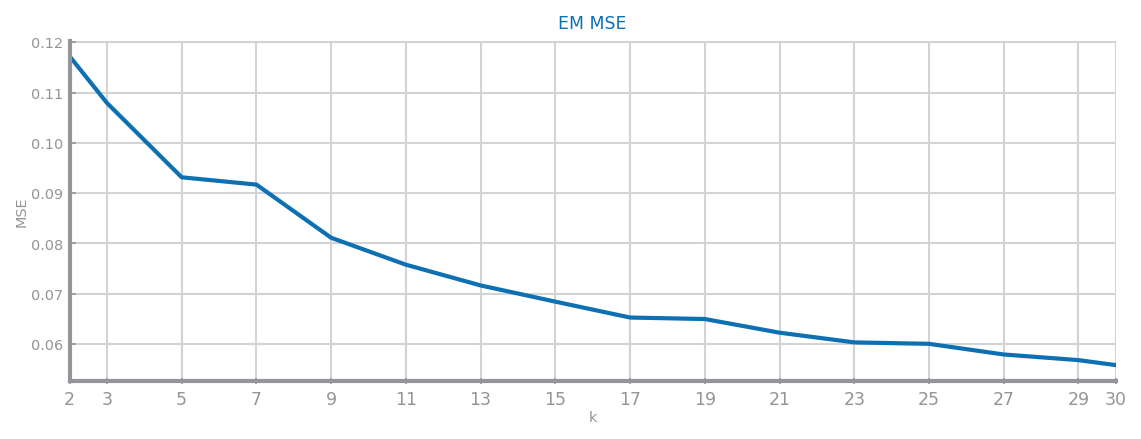

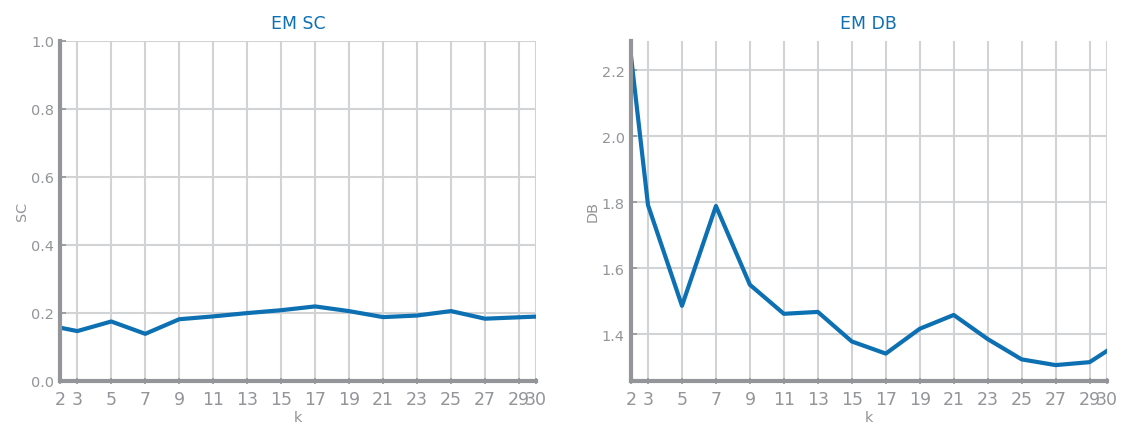

In [16]:
fig = plt.figure(figsize=(9,3))
ds.plot_line(N_CLUSTERS, mse, title='EM MSE', xlabel='k', ylabel='MSE')
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(9, 3), squeeze=False)
ds.plot_line(N_CLUSTERS, sc, title='EM SC', xlabel='k', ylabel='SC', ax=ax[0, 0], percentage=True)
ds.plot_line(N_CLUSTERS, db, title='EM DB', xlabel='k', ylabel='DB', ax=ax[0, 1], percentage=False)
plt.show()

<br/>
<br/>
<br/>
<br/>
<br/>

## Heart Failure Prediction Dataset - Standardized + Importance + FG + Outlier

### Imports

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [18]:
data: pd.DataFrame = pd.read_csv('../../datasets/TO_TEST/HF/HR_S_FImp_extra_outlierTrim_IQS.csv')
data.pop('DEATH_EVENT') #Remove target variable

N_CLUSTERS = [2, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 30]
rows, cols = (5,6)

K - 2
K - 3
K - 5
K - 7
K - 9
K - 11
K - 13
K - 15
K - 17
K - 19
K - 21
K - 23
K - 25
K - 27
K - 29
K - 30


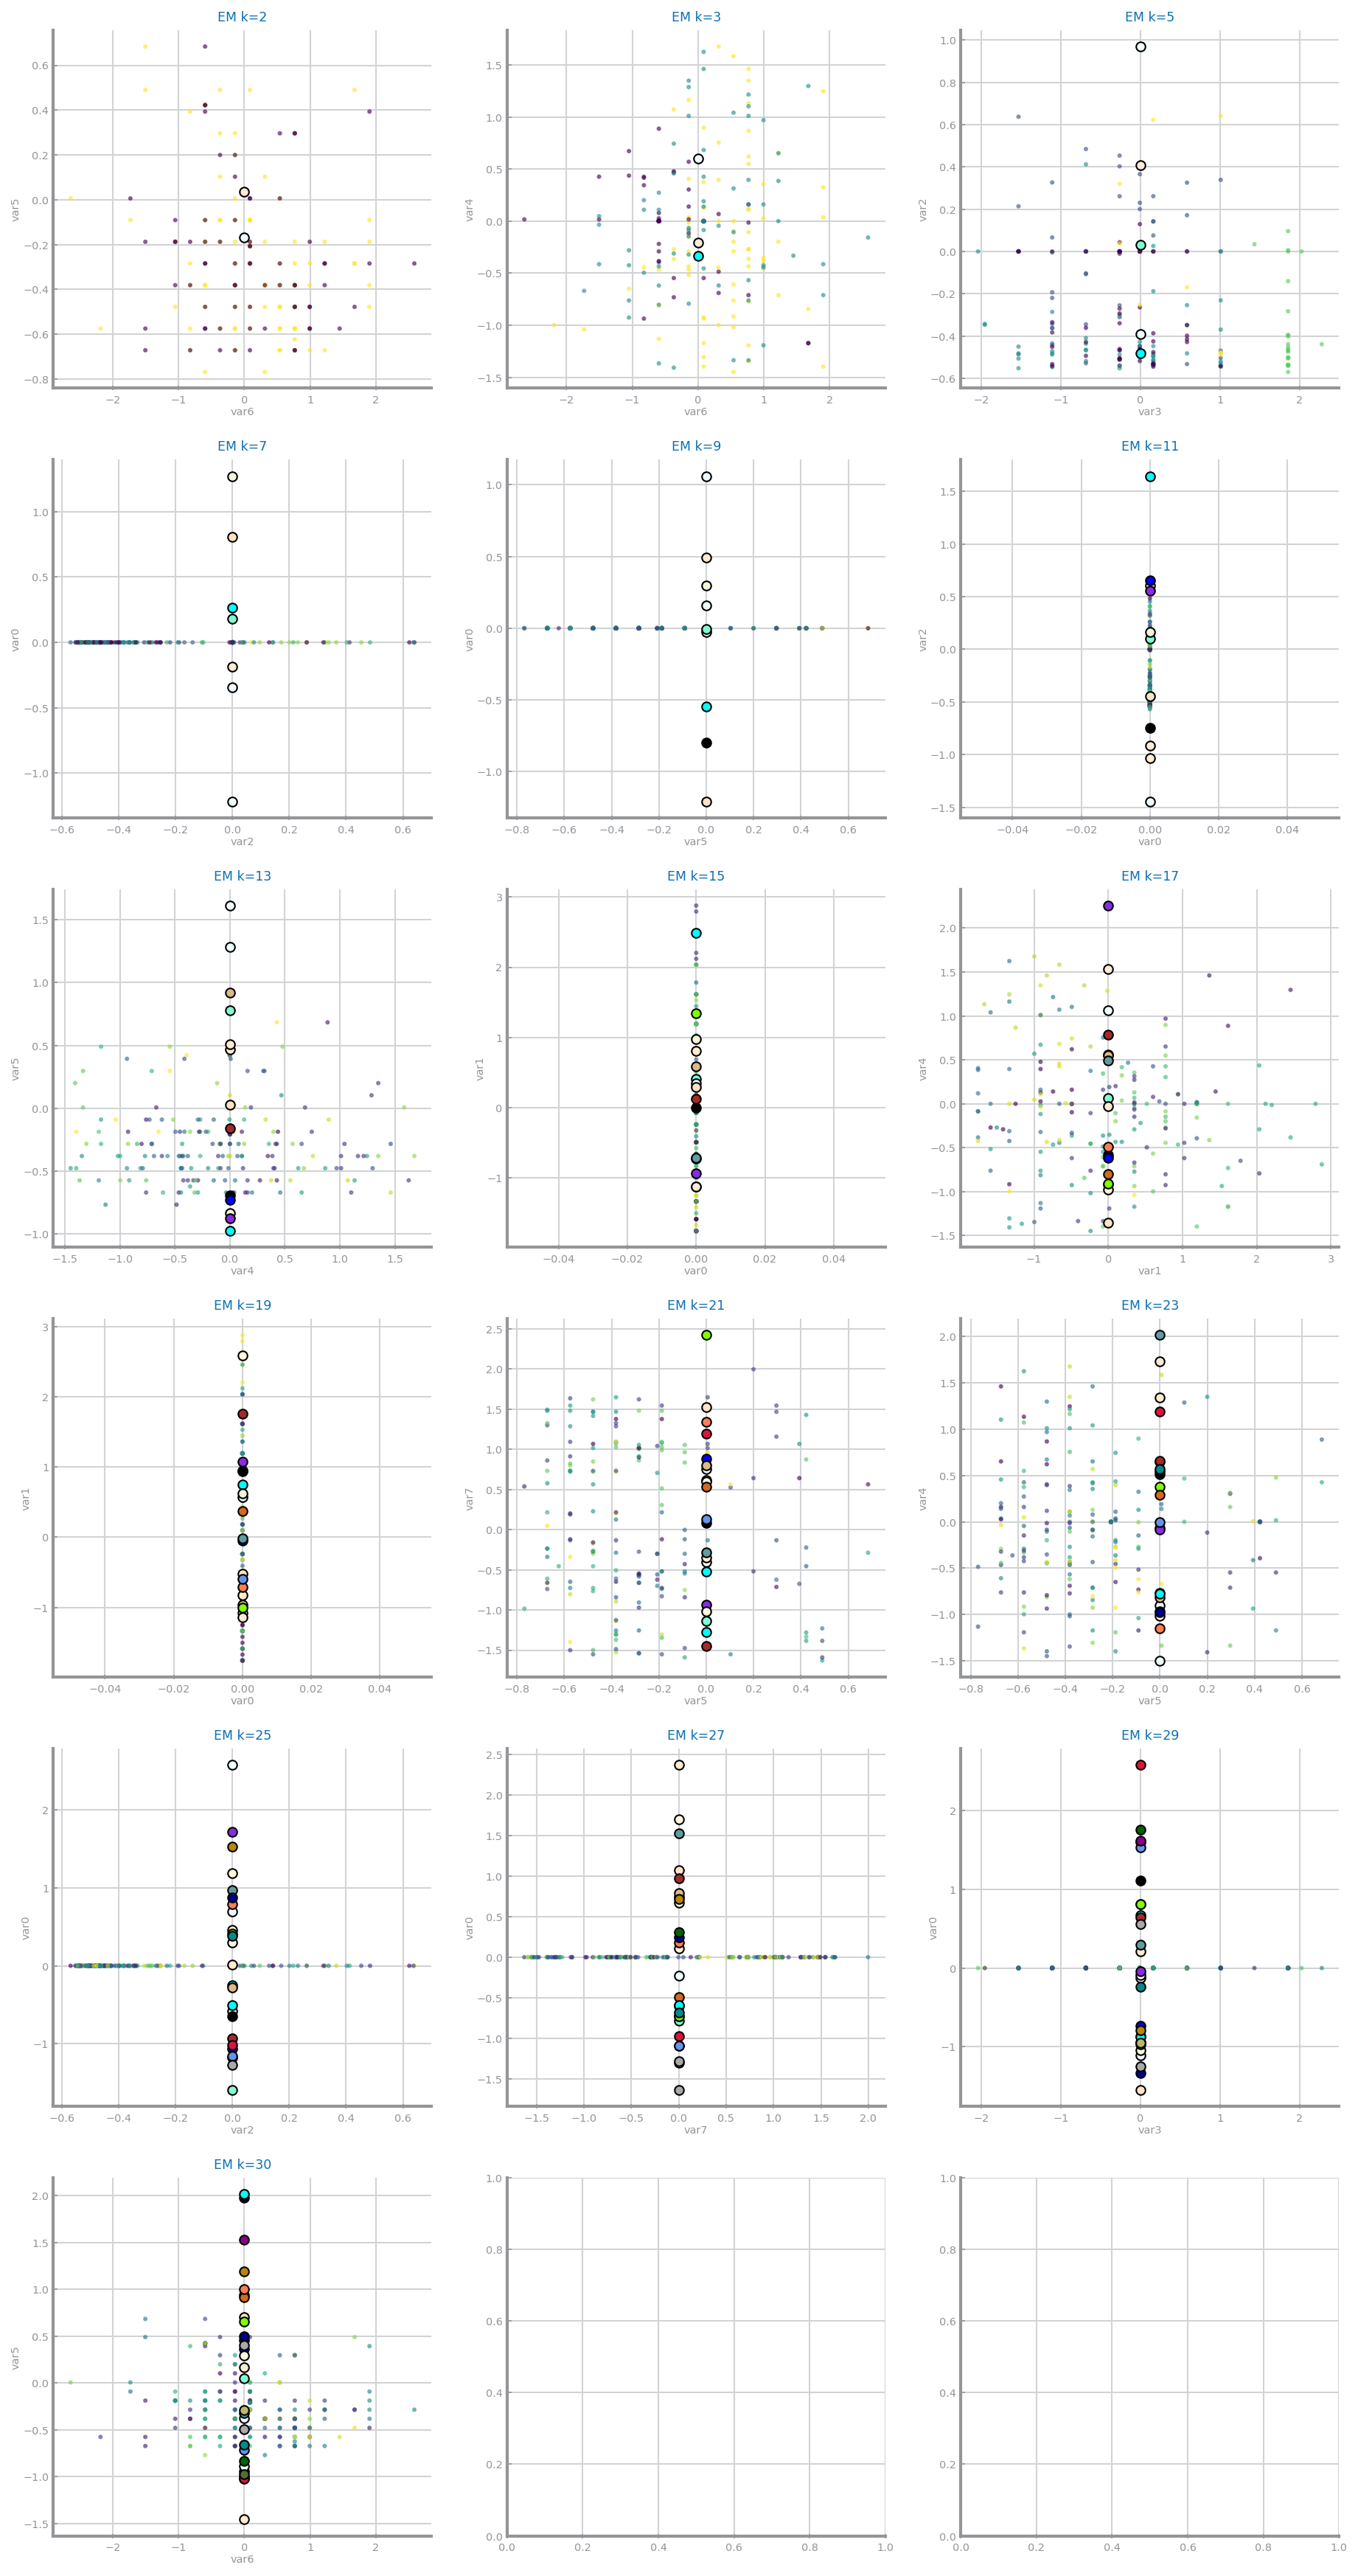

In [19]:
mse: list = []
sc: list = []
db: list = []
   
'''
for n in range(len(N_CLUSTERS)):
    fig, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
    i, j = 0, 0
    
    k = N_CLUSTERS[n]
    estimator = GaussianMixture(n_components=k)
    estimator.fit(data)
    labels = estimator.predict(data)
    
    mse.append(ds.compute_mse(data.values, labels, estimator.means_))
    sc.append(silhouette_score(data, labels))
    db.append(davies_bouldin_score(data, labels))
    
    print("K - " + str(n))
    
    for f1 in range (len(data.columns)):
        for f2 in range(f1+1, len(data.columns)): 
            ds.plot_clusters(data, f2, f1, labels.astype(float), estimator.means_, k,
                     f'EM k={k}', ax=axs[i,j])
            
            i, j = (i + 1, 0) if (j+1) % cols == 0 else (i, j + 1)    
    plt.show()
'''

rows, cols = ds.choose_grid(len(N_CLUSTERS))    
fig, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
i, j = 0, 0
for n in range(len(N_CLUSTERS)):
    k = N_CLUSTERS[n]
    
    print("K - " + str(k))

    estimator = GaussianMixture(n_components=k)
    estimator.fit(data)
    labels = estimator.predict(data)
    
    mse.append(ds.compute_mse(data.values, labels, estimator.means_))
    sc.append(silhouette_score(data, labels))
    db.append(davies_bouldin_score(data, labels))

    
    v1 = random.randint(0, len(data.columns)-1) # Random v1
    v2 = random.randint(0, len(data.columns)-1) # Random v2
    while(v1 == v2):
        v2 = random.randint(0, len(data.columns)-1)
    
    ds.plot_clusters(data, v2, v1, labels.astype(float), estimator.means_, k,
                     f'EM k={k}', ax=axs[i,j])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

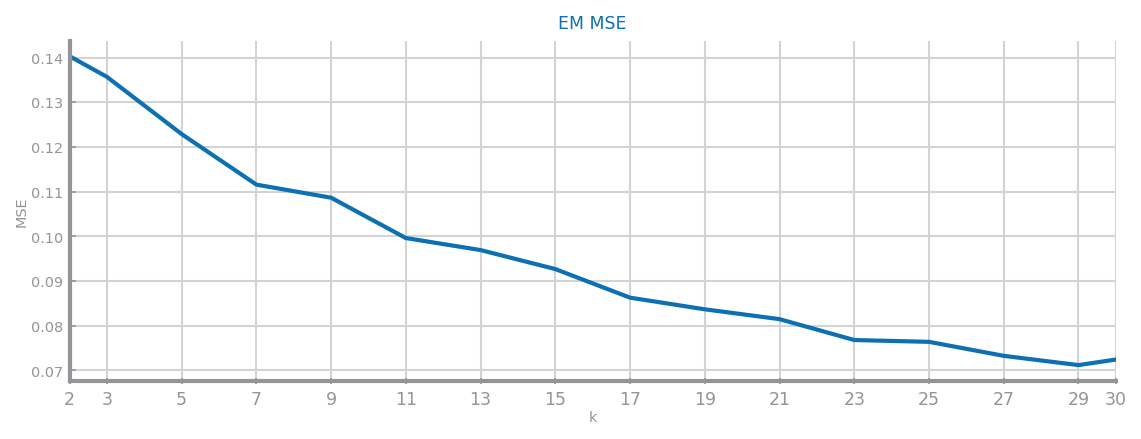

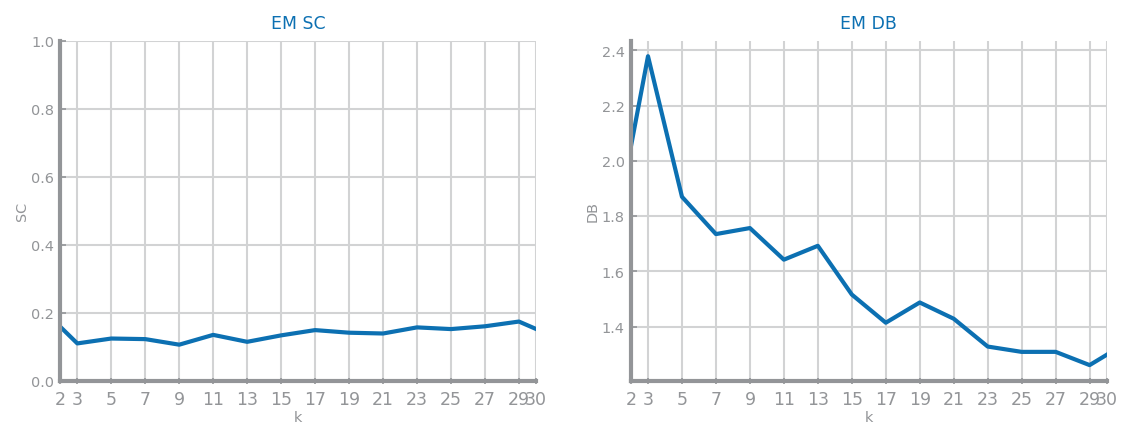

In [20]:
fig = plt.figure(figsize=(9,3))
ds.plot_line(N_CLUSTERS, mse, title='EM MSE', xlabel='k', ylabel='MSE')
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(9, 3), squeeze=False)
ds.plot_line(N_CLUSTERS, sc, title='EM SC', xlabel='k', ylabel='SC', ax=ax[0, 0], percentage=True)
ds.plot_line(N_CLUSTERS, db, title='EM DB', xlabel='k', ylabel='DB', ax=ax[0, 1], percentage=False)
plt.show()

"Yes, it is unlikely that binary data can be clustered satisfactorily. To see why, consider what happens as the K-Means algorithm processes cases.

For binary data, the Euclidean distance measure used by K-Means reduces to counting the number of variables on which two cases disagree. After the initial centers are chosen (which depends on the order of the cases), the centers are still binary data. For the first iteration, as the cases are compared to cluster means, they will always be at some integer distance from each of the centers. There will often be ties, and the case will be assigned to a cluster in an arbitrary manner. Using Euclidean distance (the only measure available to K-Means), it is impossible to overcome the symmetry and break the ties in any meaningful way.
"

### K-Means No Binary Data

In [21]:
data: pd.DataFrame = pd.read_csv('../../datasets/TO_TEST/HF/HR_S_FImp_extra_outlierTrim_IQS_B.csv')
data.pop('DEATH_EVENT') #Remove target variable
numeric_vars = data.select_dtypes(include='number').columns

numeric_data = data
binary_data = data

for n in range(len(numeric_vars)):
    num_unique = len(list(set(data[numeric_vars[n]].values)))
    if num_unique == 2 or num_unique == 1:
        numeric_data = numeric_data.drop(columns=[data.columns[n]], axis=1) #Remove binary columns
    else:
        binary_data = binary_data.drop(columns=[data.columns[n]], axis=1) #Remove non-binary columns

print(numeric_data.head())
data = numeric_data

N_CLUSTERS = [2, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 30]
rows, cols = (6,4)

        age  creatinine_phosphokinase  ejection_fraction     platelets  \
0  1.192945                  0.000166          -1.530560  1.681648e-02   
1  0.350833                 -0.449939          -1.530560 -1.038073e+00   
2 -0.912335                 -0.486071          -1.530560 -5.464741e-01   
3  1.192945                 -0.346704          -1.953749 -1.396531e+00   
4  0.350833                 -0.438583           2.278147  7.535660e-09   

   serum_creatinine  serum_sodium      time  
0          0.490057     -1.504036 -1.629502  
1         -0.090900     -1.731046 -1.590785  
2          0.490057      0.085034 -1.590785  
3         -0.187726      0.085034 -1.552067  
4          0.102752      0.312044 -1.552067  


K - 2
K - 3
K - 5
K - 7
K - 9
K - 11
K - 13
K - 15
K - 17
K - 19
K - 21
K - 23
K - 25
K - 27
K - 29
K - 30


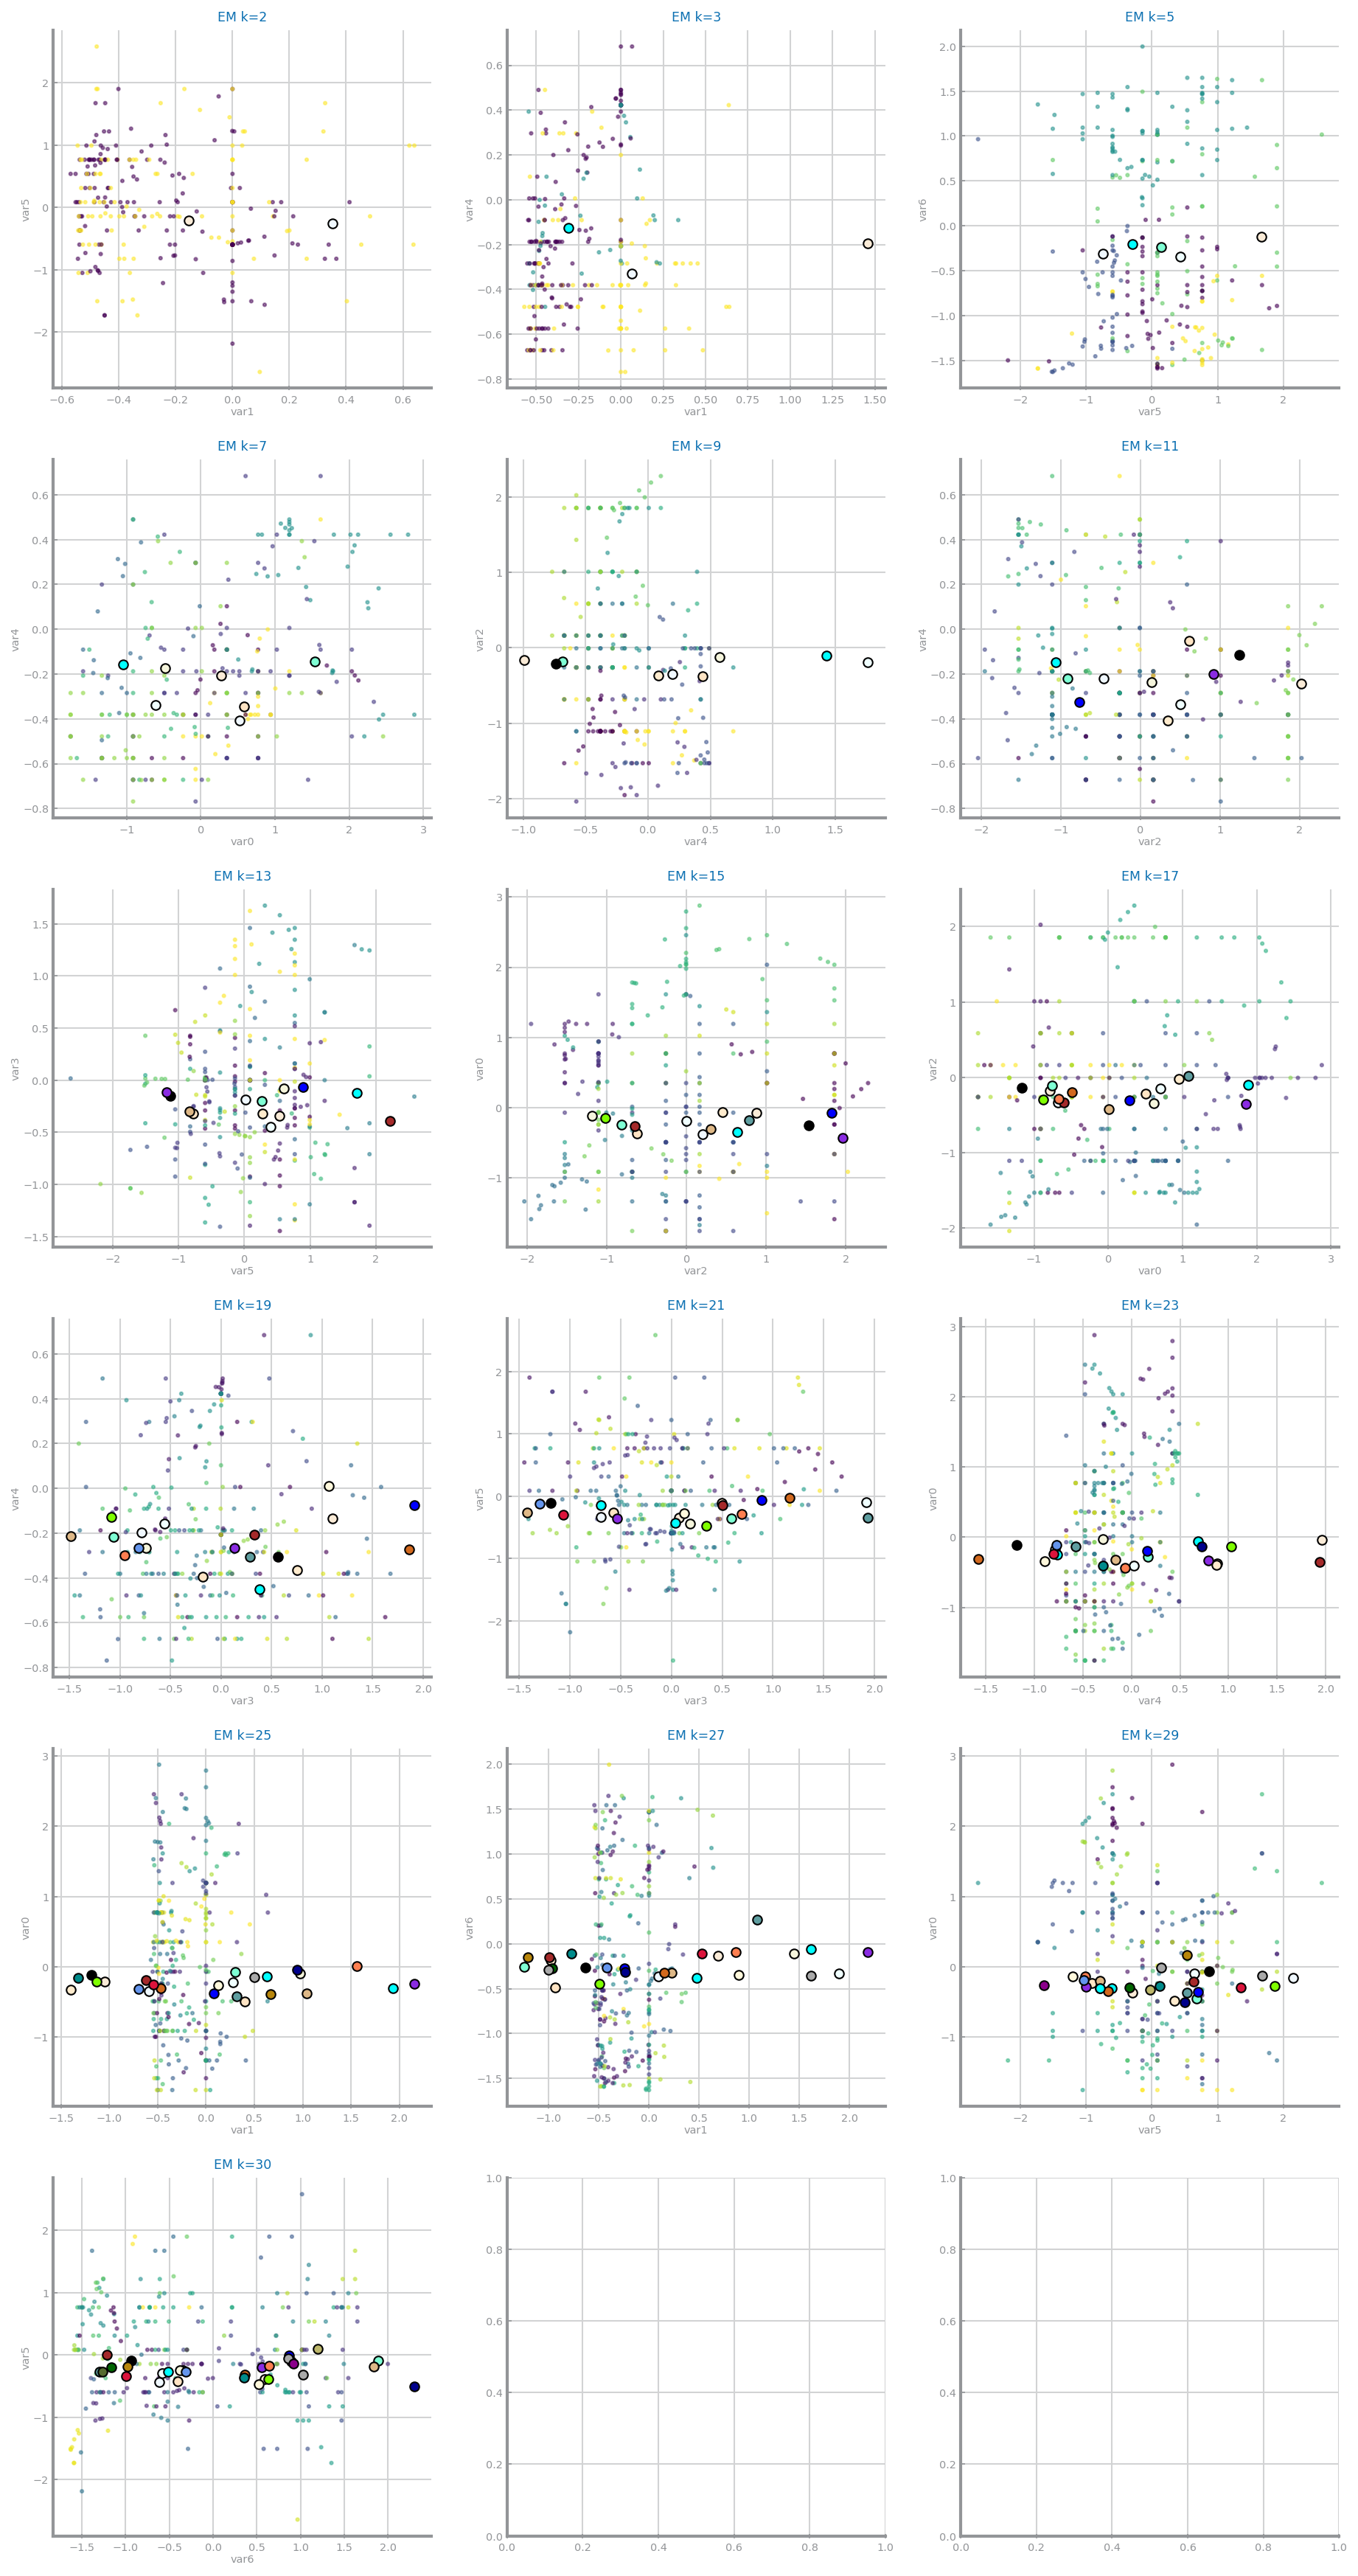

In [22]:
mse: list = []
sc: list = []
db: list = []
    
'''
for n in range(len(N_CLUSTERS)):
    fig, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
    i, j = 0, 0
    
    k = N_CLUSTERS[n]
    estimator = GaussianMixture(n_components=k)
    estimator.fit(data)
    labels = estimator.predict(data)
    
    mse.append(ds.compute_mse(data.values, labels, estimator.means_))
    sc.append(silhouette_score(data, labels))
    db.append(davies_bouldin_score(data, labels))
    
    print("K - " + str(n))
    
    for f1 in range (len(data.columns)):
        for f2 in range(f1+1, len(data.columns)): 
            ds.plot_clusters(data, f2, f1, labels.astype(float), estimator.means_, k,
                     f'EM k={k}', ax=axs[i,j])
            
            i, j = (i + 1, 0) if (j+1) % cols == 0 else (i, j + 1)    
    plt.show()
'''

rows, cols = ds.choose_grid(len(N_CLUSTERS))    
fig, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
i, j = 0, 0
for n in range(len(N_CLUSTERS)):
    k = N_CLUSTERS[n]
    
    print("K - " + str(k))

    estimator = GaussianMixture(n_components=k)
    estimator.fit(data)
    labels = estimator.predict(data)
    
    mse.append(ds.compute_mse(data.values, labels, estimator.means_))
    sc.append(silhouette_score(data, labels))
    db.append(davies_bouldin_score(data, labels))

    
    v1 = random.randint(0, len(data.columns)-1) # Random v1
    v2 = random.randint(0, len(data.columns)-1) # Random v2
    while(v1 == v2):
        v2 = random.randint(0, len(data.columns)-1)
    
    ds.plot_clusters(data, v2, v1, labels.astype(float), estimator.means_, k,
                     f'EM k={k}', ax=axs[i,j])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

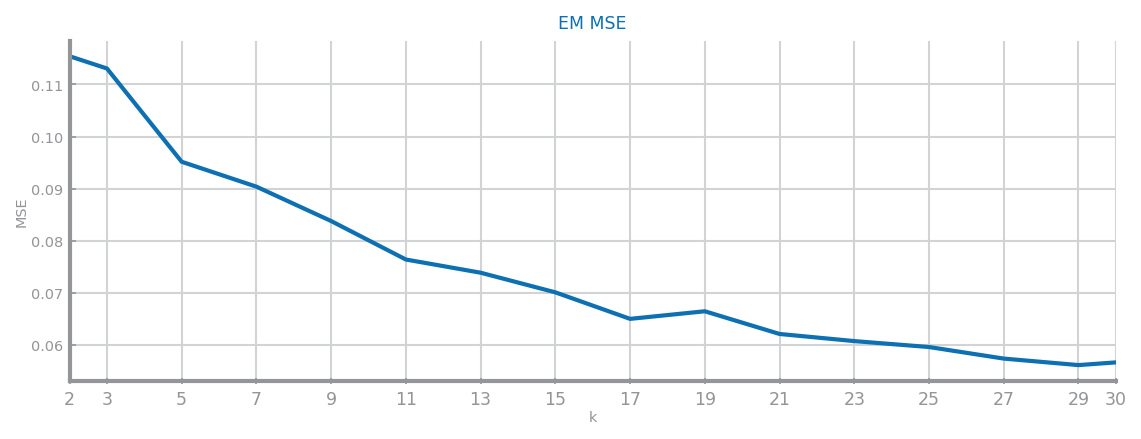

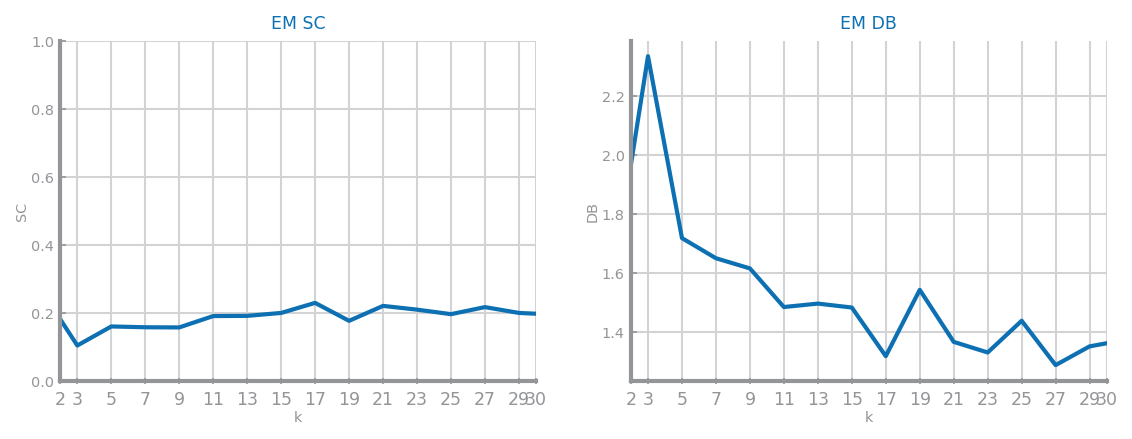

In [23]:
fig = plt.figure(figsize=(9,3))
ds.plot_line(N_CLUSTERS, mse, title='EM MSE', xlabel='k', ylabel='MSE')
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(9, 3), squeeze=False)
ds.plot_line(N_CLUSTERS, sc, title='EM SC', xlabel='k', ylabel='SC', ax=ax[0, 0], percentage=True)
ds.plot_line(N_CLUSTERS, db, title='EM DB', xlabel='k', ylabel='DB', ax=ax[0, 1], percentage=False)
plt.show()

<br/>
<br/>
<br/>
<br/>
<br/>

## Heart Failure Prediction Dataset - Standardized + Mixed + Outlier 

### Imports

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [25]:
data: pd.DataFrame = pd.read_csv('../../datasets/TO_TEST/HF/HR_S_FMixed_outlierTrim_IQS.csv')
data.pop('DEATH_EVENT') #Remove target variable

N_CLUSTERS = [2, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 30]
rows, cols = (2,5)

FileNotFoundError: [Errno 2] File ../../datasets/TO_TEST/HF/HR_S_FMixed_outlierTrim_IQS.csv does not exist: '../../datasets/TO_TEST/HF/HR_S_FMixed_outlierTrim_IQS.csv'

In [ ]:
mse: list = []
sc: list = []
db: list = []
  
'''
for n in range(len(N_CLUSTERS)):
    fig, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
    i, j = 0, 0
    
    k = N_CLUSTERS[n]
    estimator = GaussianMixture(n_components=k)
    estimator.fit(data)
    labels = estimator.predict(data)
    
    mse.append(ds.compute_mse(data.values, labels, estimator.means_))
    sc.append(silhouette_score(data, labels))
    db.append(davies_bouldin_score(data, labels))
    
    print("K - " + str(n))
    
    for f1 in range (len(data.columns)):
        for f2 in range(f1+1, len(data.columns)): 
            ds.plot_clusters(data, f2, f1, labels.astype(float), estimator.means_, k,
                     f'EM k={k}', ax=axs[i,j])
            
            i, j = (i + 1, 0) if (j+1) % cols == 0 else (i, j + 1)    
    plt.show()
'''

rows, cols = ds.choose_grid(len(N_CLUSTERS))    
fig, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
i, j = 0, 0
for n in range(len(N_CLUSTERS)):
    k = N_CLUSTERS[n]
    
    print("K - " + str(k))

    estimator = GaussianMixture(n_components=k)
    estimator.fit(data)
    labels = estimator.predict(data)
    
    mse.append(ds.compute_mse(data.values, labels, estimator.means_))
    sc.append(silhouette_score(data, labels))
    db.append(davies_bouldin_score(data, labels))

    
    v1 = random.randint(0, len(data.columns)-1) # Random v1
    v2 = random.randint(0, len(data.columns)-1) # Random v2
    while(v1 == v2):
        v2 = random.randint(0, len(data.columns)-1)
    
    ds.plot_clusters(data, v2, v1, labels.astype(float), estimator.means_, k,
                     f'EM k={k}', ax=axs[i,j])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

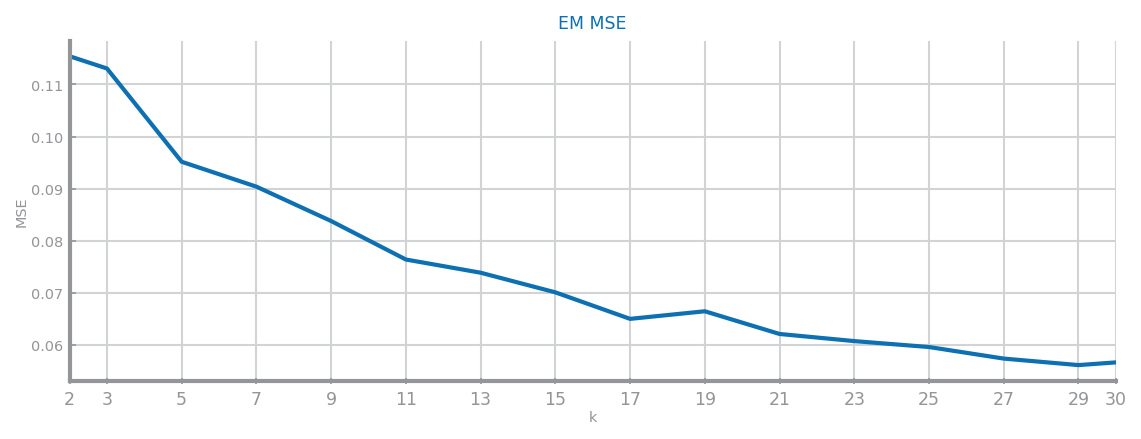

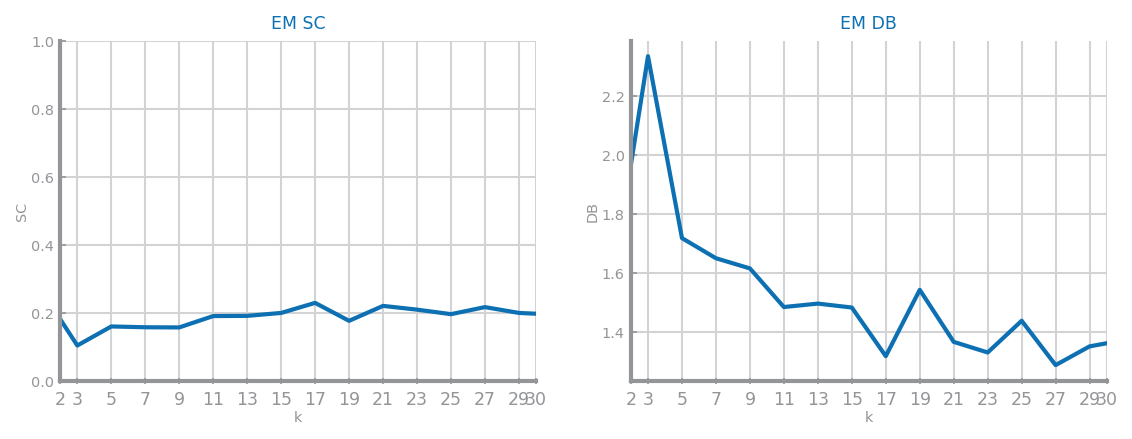

In [26]:
fig = plt.figure(figsize=(9,3))
ds.plot_line(N_CLUSTERS, mse, title='EM MSE', xlabel='k', ylabel='MSE')
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(9, 3), squeeze=False)
ds.plot_line(N_CLUSTERS, sc, title='EM SC', xlabel='k', ylabel='SC', ax=ax[0, 0], percentage=True)
ds.plot_line(N_CLUSTERS, db, title='EM DB', xlabel='k', ylabel='DB', ax=ax[0, 1], percentage=False)
plt.show()

"Yes, it is unlikely that binary data can be clustered satisfactorily. To see why, consider what happens as the K-Means algorithm processes cases.

For binary data, the Euclidean distance measure used by K-Means reduces to counting the number of variables on which two cases disagree. After the initial centers are chosen (which depends on the order of the cases), the centers are still binary data. For the first iteration, as the cases are compared to cluster means, they will always be at some integer distance from each of the centers. There will often be ties, and the case will be assigned to a cluster in an arbitrary manner. Using Euclidean distance (the only measure available to K-Means), it is impossible to overcome the symmetry and break the ties in any meaningful way.
"

### K-Means No Binary Data

In [27]:
data: pd.DataFrame = pd.read_csv('../../datasets/TO_TEST/HF/HR_S_FMixed_outlierTrim_IQS_B.csv')
data.pop('DEATH_EVENT') #Remove target variable
numeric_vars = data.select_dtypes(include='number').columns

numeric_data = data
binary_data = data

for n in range(len(numeric_vars)):
    num_unique = len(list(set(data[numeric_vars[n]].values)))
    if num_unique == 2 or num_unique == 1:
        numeric_data = numeric_data.drop(columns=[data.columns[n]], axis=1) #Remove binary columns
    else:
        binary_data = binary_data.drop(columns=[data.columns[n]], axis=1) #Remove non-binary columns

print(numeric_data.head())
data = numeric_data

N_CLUSTERS = [2, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 30]
rows, cols = (3,4)

        age  creatinine_phosphokinase  ejection_fraction  serum_creatinine  \
0  1.192945                  0.000166          -1.530560          0.490057   
1  0.350833                 -0.449939          -1.530560         -0.090900   
2 -0.912335                 -0.486071          -1.530560          0.490057   
3  2.456114                 -0.552141           0.162199          0.683709   
4  1.192945                 -0.346704          -1.953749         -0.187726   

       time  
0 -1.629502  
1 -1.590785  
2 -1.590785  
3 -1.577879  
4 -1.552067  


In [ ]:
mse: list = []
sc: list = []
db: list = []

'''
for n in range(len(N_CLUSTERS)):
    fig, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
    i, j = 0, 0
    
    k = N_CLUSTERS[n]
    estimator = GaussianMixture(n_components=k)
    estimator.fit(data)
    labels = estimator.predict(data)
    
    mse.append(ds.compute_mse(data.values, labels, estimator.means_))
    sc.append(silhouette_score(data, labels))
    db.append(davies_bouldin_score(data, labels))
    
    print("K - " + str(n))
    
    for f1 in range (len(data.columns)):
        for f2 in range(f1+1, len(data.columns)): 
            ds.plot_clusters(data, f2, f1, labels.astype(float), estimator.means_, k,
                     f'EM k={k}', ax=axs[i,j])
            
            i, j = (i + 1, 0) if (j+1) % cols == 0 else (i, j + 1)    
    plt.show()
'''

rows, cols = ds.choose_grid(len(N_CLUSTERS))    
fig, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
i, j = 0, 0
for n in range(len(N_CLUSTERS)):
    k = N_CLUSTERS[n]
    
    print("K - " + str(k))

    estimator = GaussianMixture(n_components=k)
    estimator.fit(data)
    labels = estimator.predict(data)
    
    mse.append(ds.compute_mse(data.values, labels, estimator.means_))
    sc.append(silhouette_score(data, labels))
    db.append(davies_bouldin_score(data, labels))

    
    v1 = random.randint(0, len(data.columns)-1) # Random v1
    v2 = random.randint(0, len(data.columns)-1) # Random v2
    while(v1 == v2):
        v2 = random.randint(0, len(data.columns)-1)
    
    ds.plot_clusters(data, v2, v1, labels.astype(float), estimator.means_, k,
                     f'EM k={k}', ax=axs[i,j])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

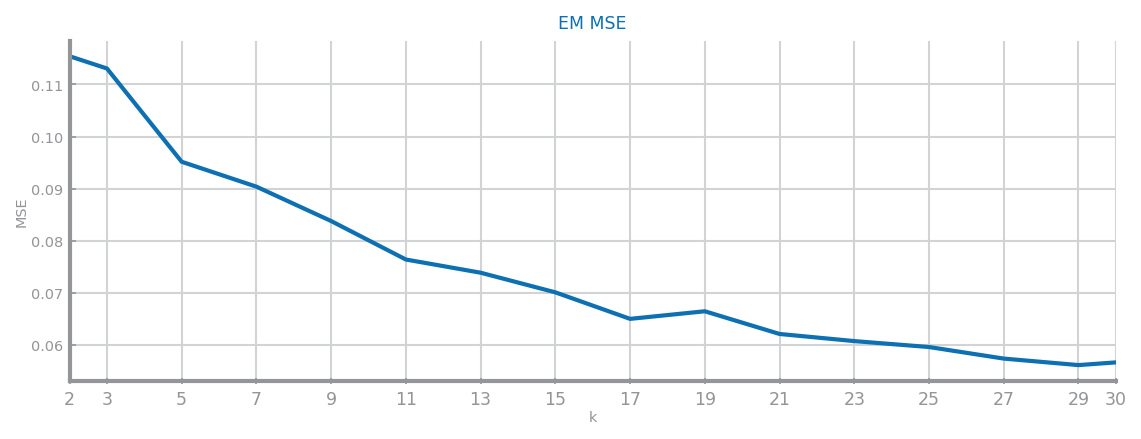

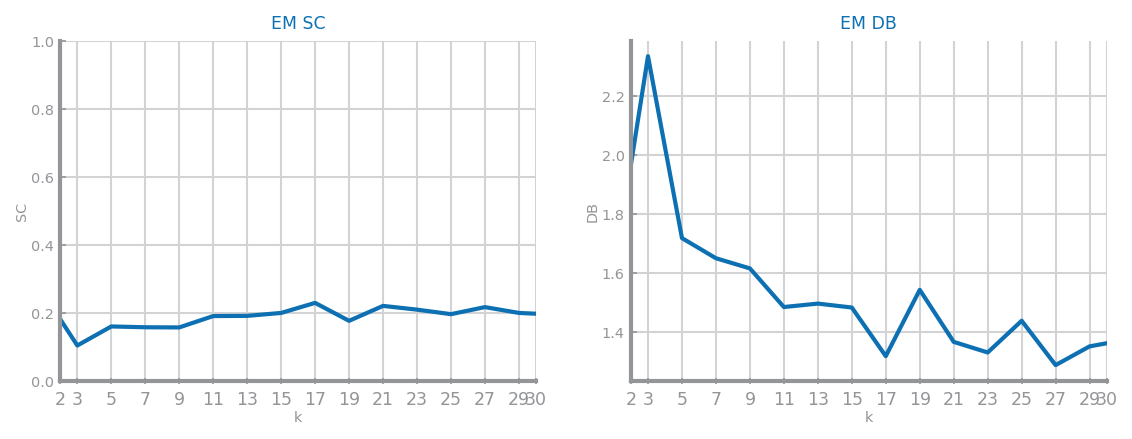

In [28]:
fig = plt.figure(figsize=(9,3))
ds.plot_line(N_CLUSTERS, mse, title='EM MSE', xlabel='k', ylabel='MSE')
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(9, 3), squeeze=False)
ds.plot_line(N_CLUSTERS, sc, title='EM SC', xlabel='k', ylabel='SC', ax=ax[0, 0], percentage=True)
ds.plot_line(N_CLUSTERS, db, title='EM DB', xlabel='k', ylabel='DB', ax=ax[0, 1], percentage=False)
plt.show()

<br/>
<br/>
<br/>
<br/>
<br/>

## Heart Failure Prediction Dataset - Standardized + RFE + Outlier + PCA

### Imports

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [30]:
data: pd.DataFrame = pd.read_csv('../../datasets/TO_TEST/HF/HR_S_FRFE_extra_outlierTrim_IQS_pca.csv')
data.pop('DEATH_EVENT') #Remove target variable

N_CLUSTERS = [2, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 30]
rows, cols = (2,5)

K - 2
K - 3
K - 5
K - 7
K - 9
K - 11
K - 13
K - 15
K - 17
K - 19
K - 21
K - 23
K - 25
K - 27
K - 29
K - 30


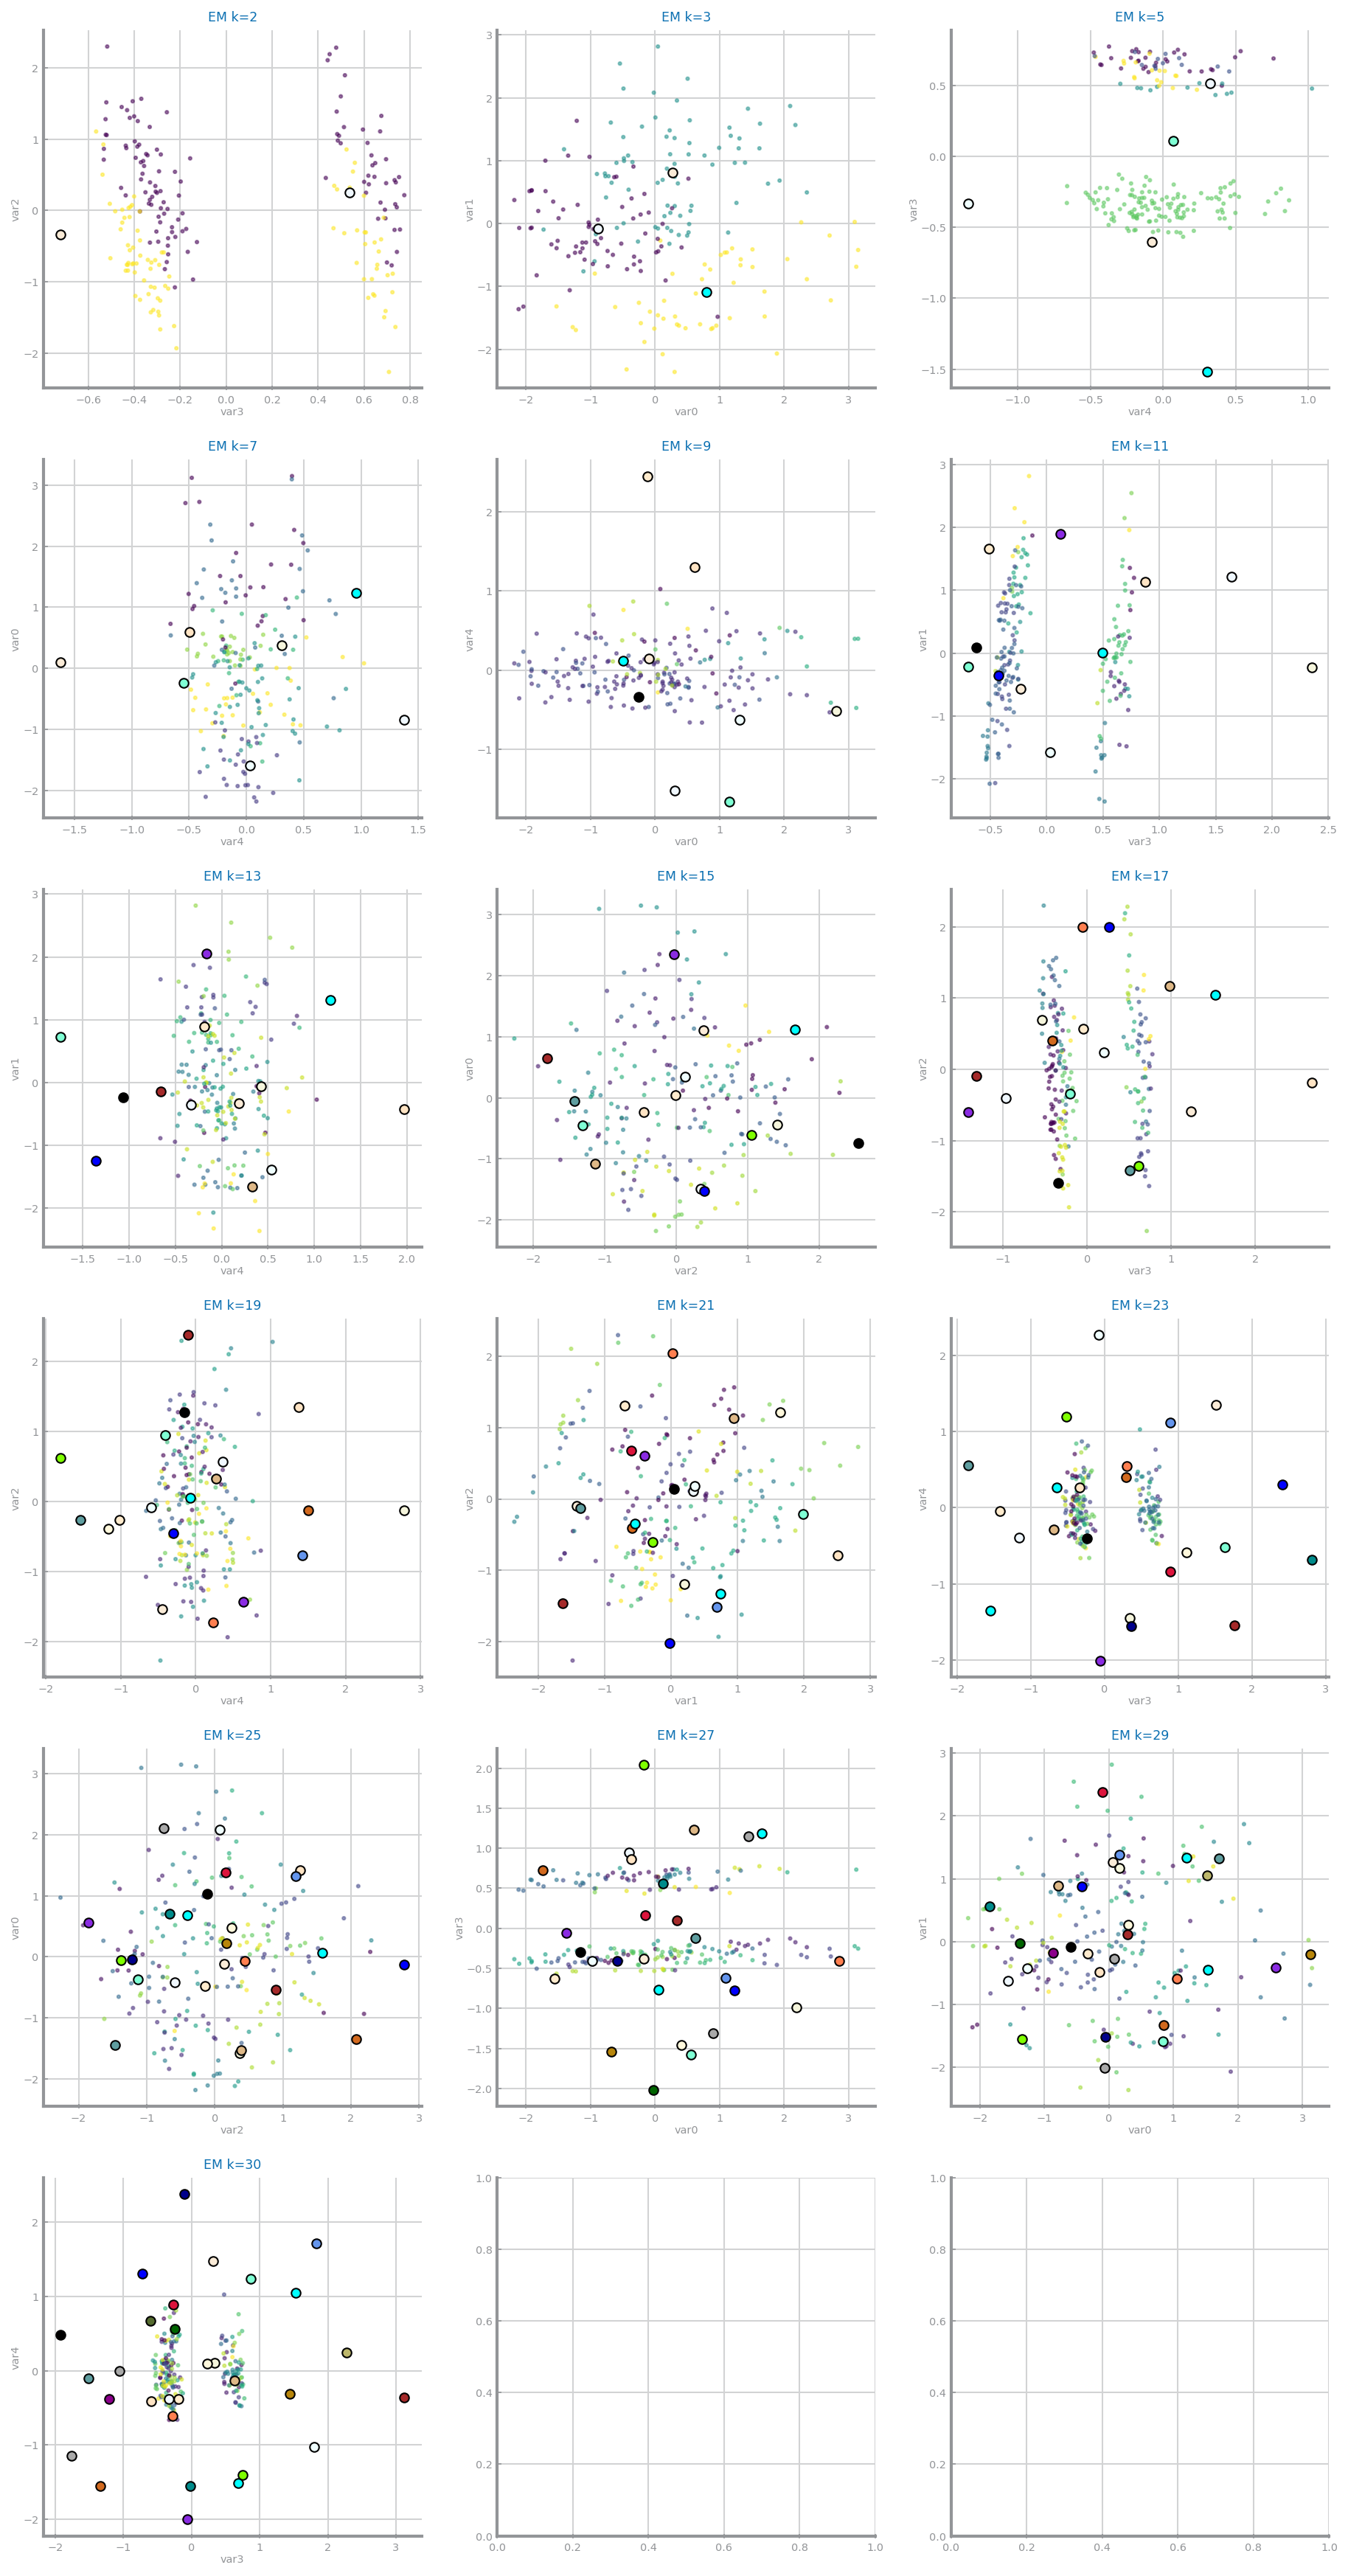

In [31]:
mse: list = []
sc: list = []
db: list = []
  
'''
for n in range(len(N_CLUSTERS)):
    fig, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
    i, j = 0, 0
    
    k = N_CLUSTERS[n]
    estimator = GaussianMixture(n_components=k)
    estimator.fit(data)
    labels = estimator.predict(data)
    
    mse.append(ds.compute_mse(data.values, labels, estimator.means_))
    sc.append(silhouette_score(data, labels))
    db.append(davies_bouldin_score(data, labels))
    
    print("K - " + str(n))
    
    for f1 in range (len(data.columns)):
        for f2 in range(f1+1, len(data.columns)): 
            ds.plot_clusters(data, f2, f1, labels.astype(float), estimator.means_, k,
                     f'EM k={k}', ax=axs[i,j])
            
            i, j = (i + 1, 0) if (j+1) % cols == 0 else (i, j + 1)    
    plt.show()
'''

rows, cols = ds.choose_grid(len(N_CLUSTERS))    
fig, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
i, j = 0, 0
for n in range(len(N_CLUSTERS)):
    k = N_CLUSTERS[n]
    
    print("K - " + str(k))

    estimator = GaussianMixture(n_components=k)
    estimator.fit(data)
    labels = estimator.predict(data)
    
    mse.append(ds.compute_mse(data.values, labels, estimator.means_))
    sc.append(silhouette_score(data, labels))
    db.append(davies_bouldin_score(data, labels))

    
    v1 = random.randint(0, len(data.columns)-1) # Random v1
    v2 = random.randint(0, len(data.columns)-1) # Random v2
    while(v1 == v2):
        v2 = random.randint(0, len(data.columns)-1)
    
    ds.plot_clusters(data, v2, v1, labels.astype(float), estimator.means_, k,
                     f'EM k={k}', ax=axs[i,j])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

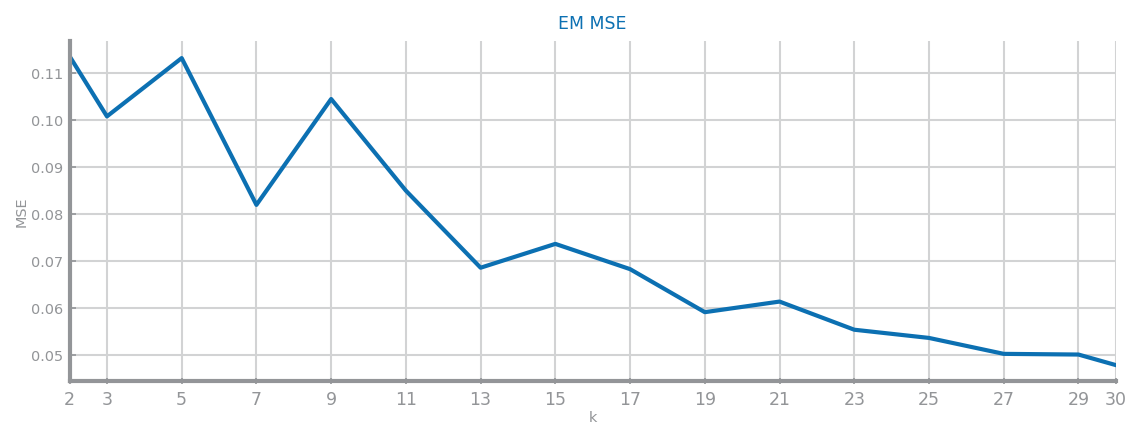

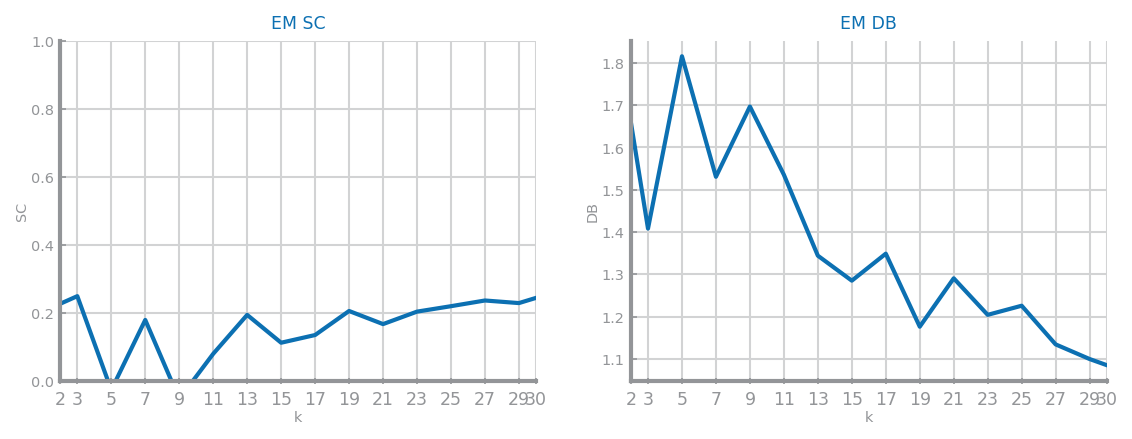

In [32]:
fig = plt.figure(figsize=(9,3))
ds.plot_line(N_CLUSTERS, mse, title='EM MSE', xlabel='k', ylabel='MSE')
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(9, 3), squeeze=False)
ds.plot_line(N_CLUSTERS, sc, title='EM SC', xlabel='k', ylabel='SC', ax=ax[0, 0], percentage=True)
ds.plot_line(N_CLUSTERS, db, title='EM DB', xlabel='k', ylabel='DB', ax=ax[0, 1], percentage=False)
plt.show()

"Yes, it is unlikely that binary data can be clustered satisfactorily. To see why, consider what happens as the K-Means algorithm processes cases.

For binary data, the Euclidean distance measure used by K-Means reduces to counting the number of variables on which two cases disagree. After the initial centers are chosen (which depends on the order of the cases), the centers are still binary data. For the first iteration, as the cases are compared to cluster means, they will always be at some integer distance from each of the centers. There will often be ties, and the case will be assigned to a cluster in an arbitrary manner. Using Euclidean distance (the only measure available to K-Means), it is impossible to overcome the symmetry and break the ties in any meaningful way.
"

### K-Means No Binary Data

In [33]:
data: pd.DataFrame = pd.read_csv('../../datasets/TO_TEST/HF/HR_S_FRFE_extra_outlierTrim_IQS_pca.csv')
data.pop('DEATH_EVENT') #Remove target variable
numeric_vars = data.select_dtypes(include='number').columns

numeric_data = data
binary_data = data

for n in range(len(numeric_vars)):
    num_unique = len(list(set(data[numeric_vars[n]].values)))
    if num_unique == 2 or num_unique == 1:
        numeric_data = numeric_data.drop(columns=[data.columns[n]], axis=1) #Remove binary columns
    else:
        binary_data = binary_data.drop(columns=[data.columns[n]], axis=1) #Remove non-binary columns

print(numeric_data.head())
data = numeric_data

N_CLUSTERS = [2, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 30]
rows, cols = (3,4)

     Eigen0    Eigen1    Eigen2    Eigen3    Eigen4
0  2.177103  1.568266 -0.260517 -0.174247  0.485948
1  1.441564  1.827750  0.207391 -0.206018 -0.127223
2  0.505856  2.305269  0.784276 -0.284719  0.523056
3  2.095673  1.870533 -0.444560 -0.127507 -0.303925
4  1.159244 -1.505008  2.106687  0.441586  0.440423


K - 2
K - 3
K - 5
K - 7
K - 9
K - 11
K - 13
K - 15
K - 17
K - 19
K - 21
K - 23
K - 25
K - 27
K - 29
K - 30


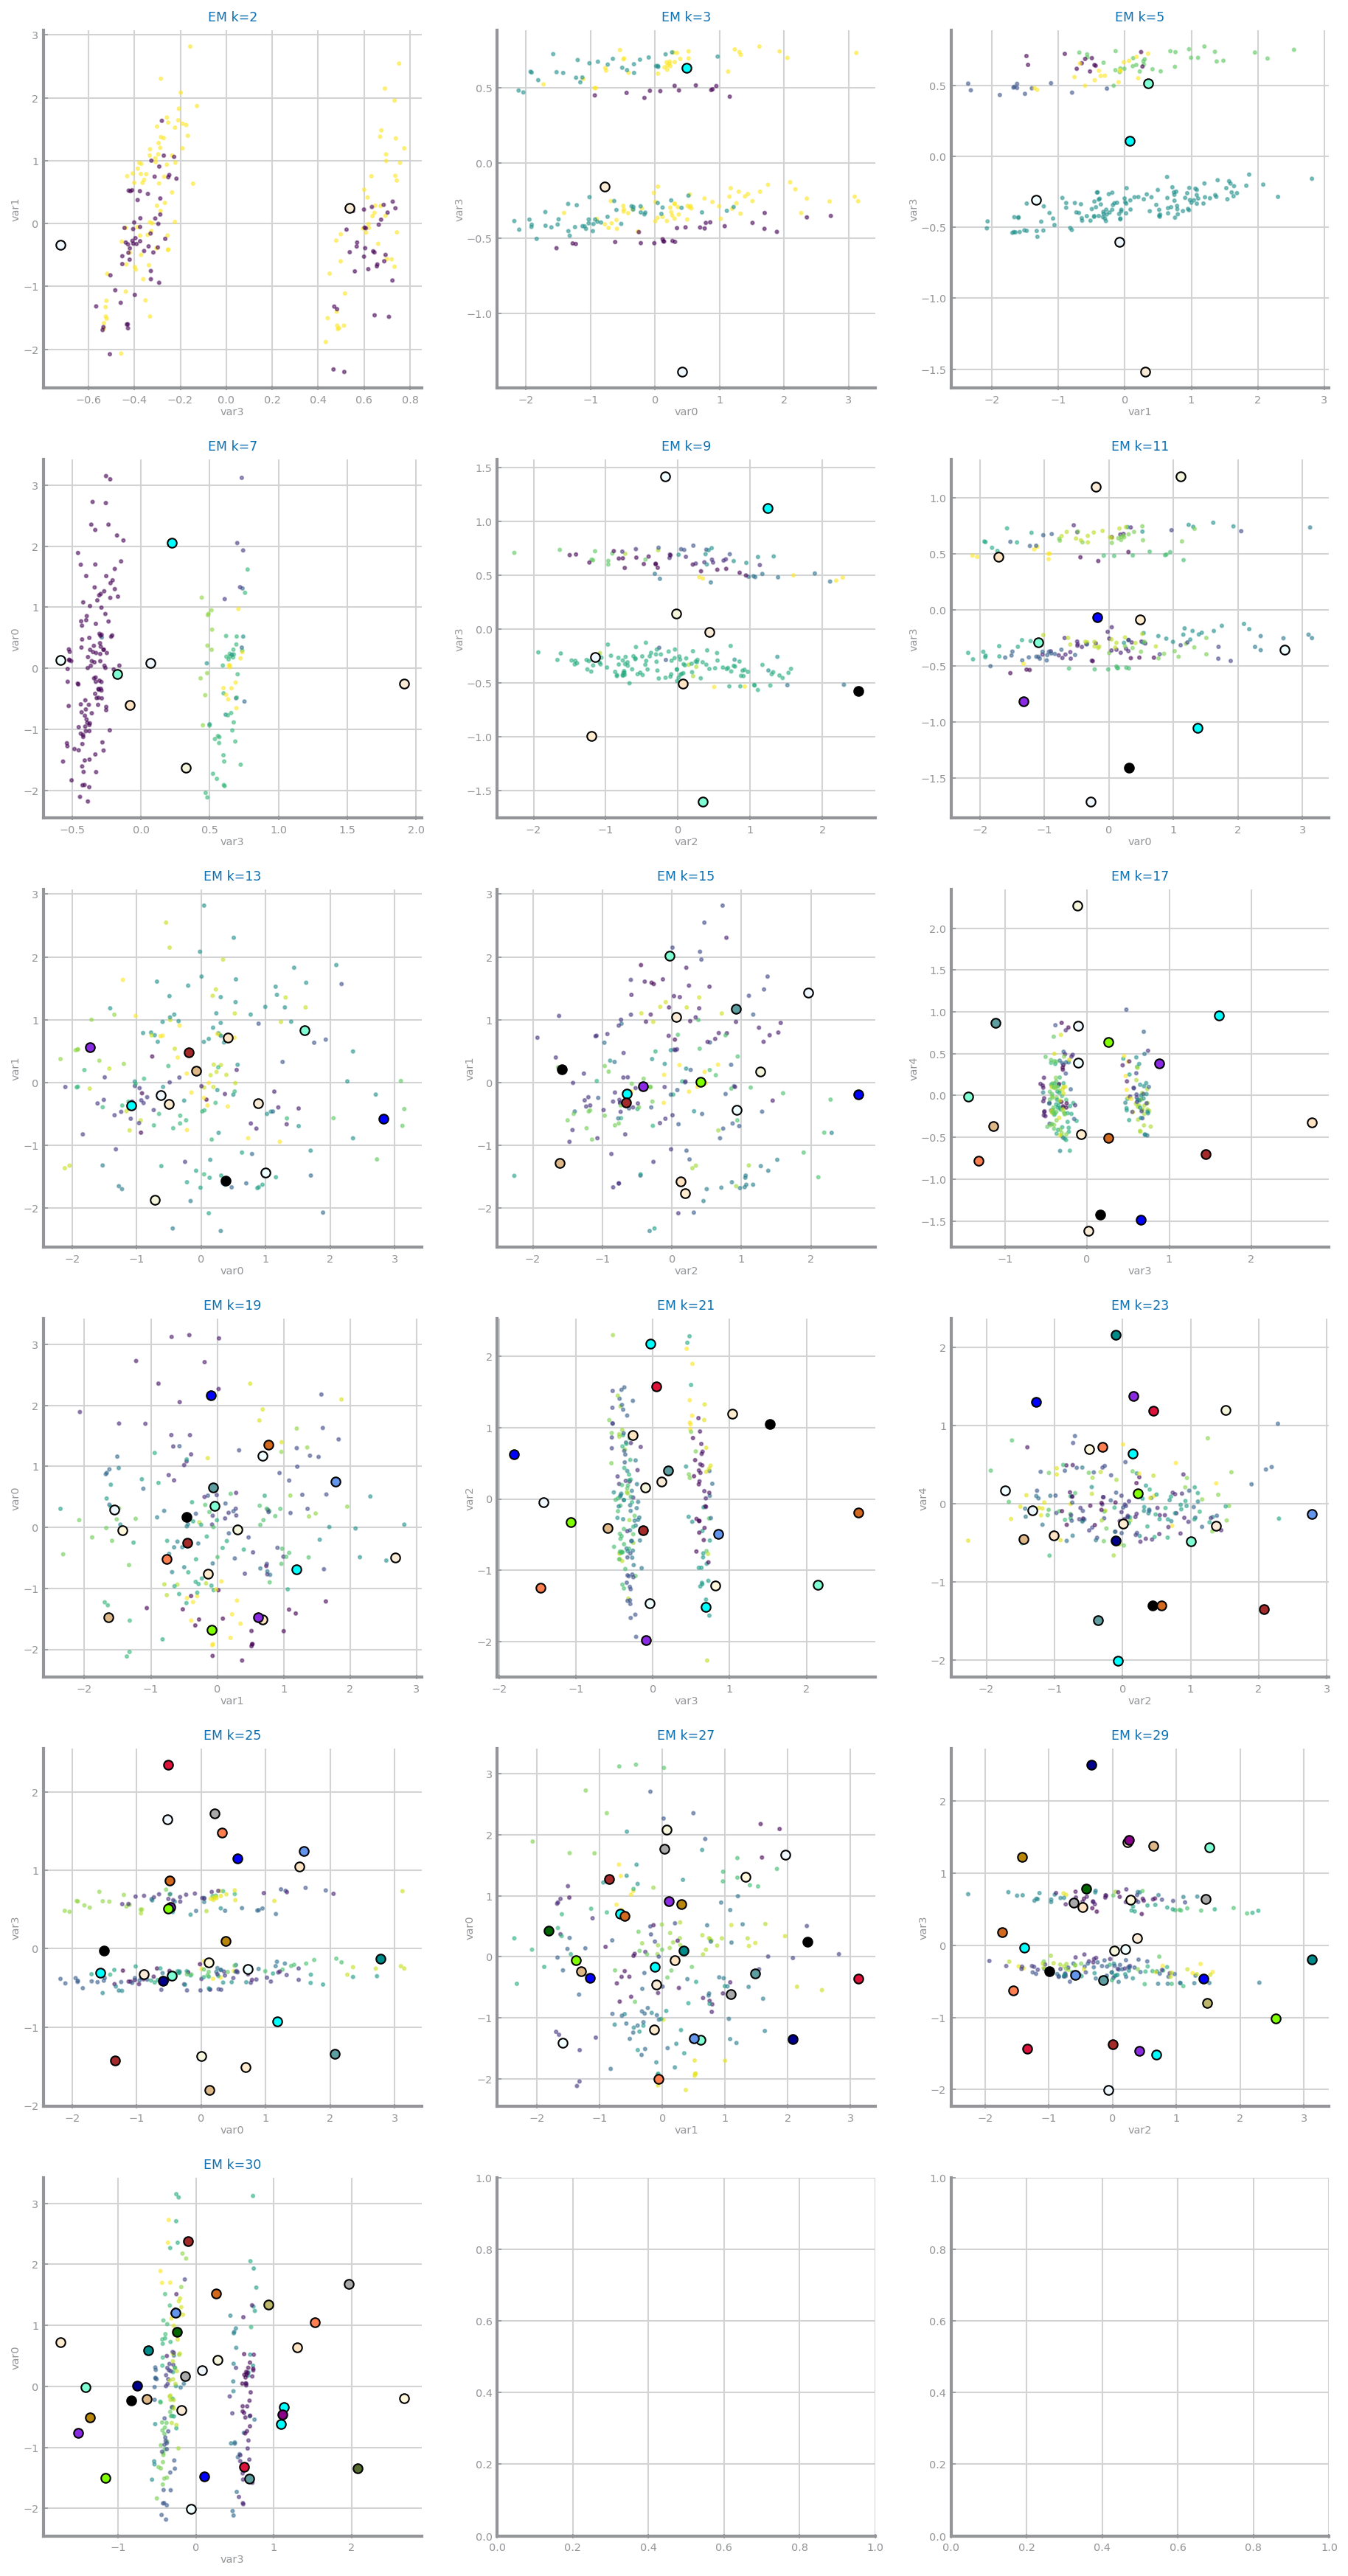

In [35]:
mse: list = []
sc: list = []
db: list = []

'''
for n in range(len(N_CLUSTERS)):
    fig, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
    i, j = 0, 0
    
    k = N_CLUSTERS[n]
    estimator = GaussianMixture(n_components=k)
    estimator.fit(data)
    labels = estimator.predict(data)
    
    mse.append(ds.compute_mse(data.values, labels, estimator.means_))
    sc.append(silhouette_score(data, labels))
    db.append(davies_bouldin_score(data, labels))
    
    print("K - " + str(n))
    
    for f1 in range (len(data.columns)):
        for f2 in range(f1+1, len(data.columns)): 
            ds.plot_clusters(data, f2, f1, labels.astype(float), estimator.means_, k,
                     f'EM k={k}', ax=axs[i,j])
            
            i, j = (i + 1, 0) if (j+1) % cols == 0 else (i, j + 1)    
    plt.show()
'''

rows, cols = ds.choose_grid(len(N_CLUSTERS))    
fig, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
i, j = 0, 0
for n in range(len(N_CLUSTERS)):
    k = N_CLUSTERS[n]
    
    print("K - " + str(k))

    estimator = GaussianMixture(n_components=k)
    estimator.fit(data)
    labels = estimator.predict(data)
    
    mse.append(ds.compute_mse(data.values, labels, estimator.means_))
    sc.append(silhouette_score(data, labels))
    db.append(davies_bouldin_score(data, labels))

    
    v1 = random.randint(0, len(data.columns)-1) # Random v1
    v2 = random.randint(0, len(data.columns)-1) # Random v2
    while(v1 == v2):
        v2 = random.randint(0, len(data.columns)-1)
    
    ds.plot_clusters(data, v2, v1, labels.astype(float), estimator.means_, k,
                     f'EM k={k}', ax=axs[i,j])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

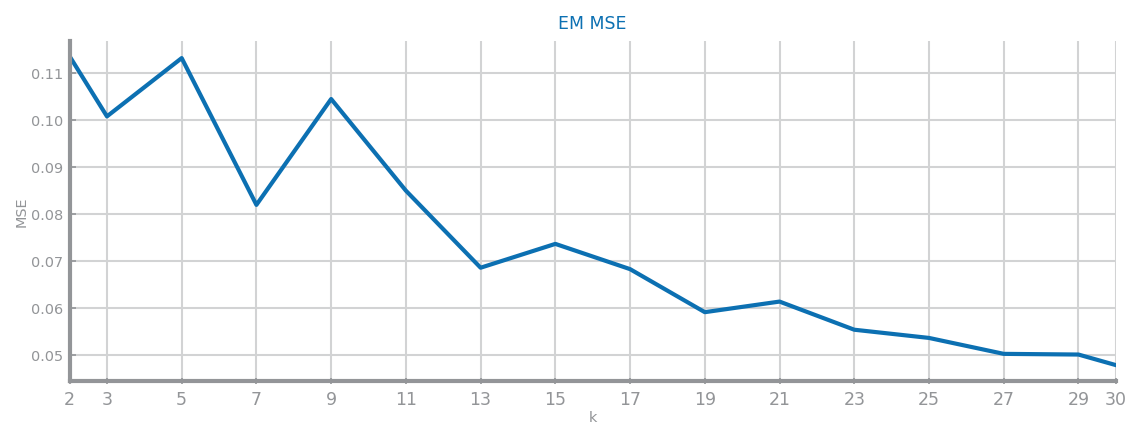

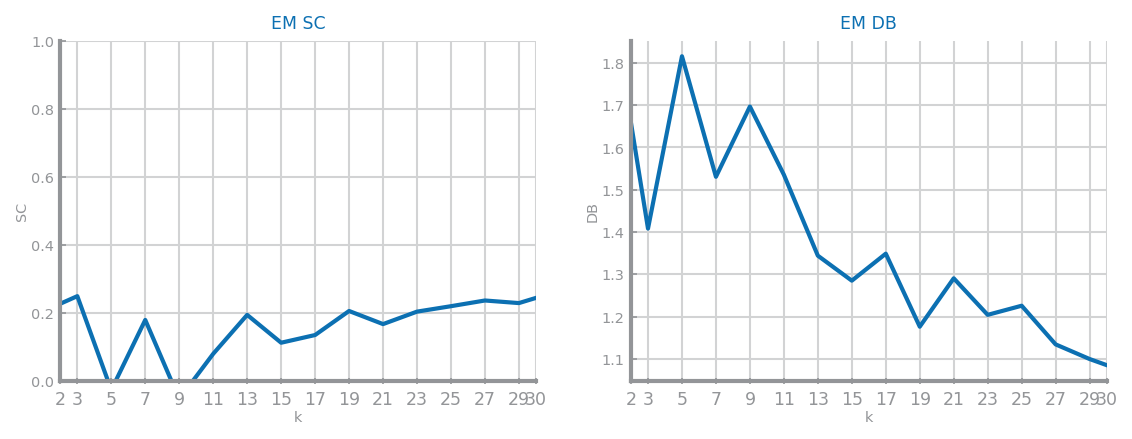

In [34]:
fig = plt.figure(figsize=(9,3))
ds.plot_line(N_CLUSTERS, mse, title='EM MSE', xlabel='k', ylabel='MSE')
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(9, 3), squeeze=False)
ds.plot_line(N_CLUSTERS, sc, title='EM SC', xlabel='k', ylabel='SC', ax=ax[0, 0], percentage=True)
ds.plot_line(N_CLUSTERS, db, title='EM DB', xlabel='k', ylabel='DB', ax=ax[0, 1], percentage=False)
plt.show()

<br/>
<br/>
<br/>
<br/>
<br/>

## Heart Failure Prediction Dataset - Standardized + RFE + Outlier + KPCA

### Imports

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [37]:
data: pd.DataFrame = pd.read_csv('../../datasets/TO_TEST/HF/HR_S_FRFE_extra_outlierTrim_IQS_kpca.csv')
data.pop('DEATH_EVENT') #Remove target variable

N_CLUSTERS = [2, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 30]
rows, cols = (2,5)

K - 2
K - 3
K - 5
K - 7
K - 9
K - 11
K - 13
K - 15
K - 17
K - 19
K - 21
K - 23
K - 25
K - 27
K - 29
K - 30


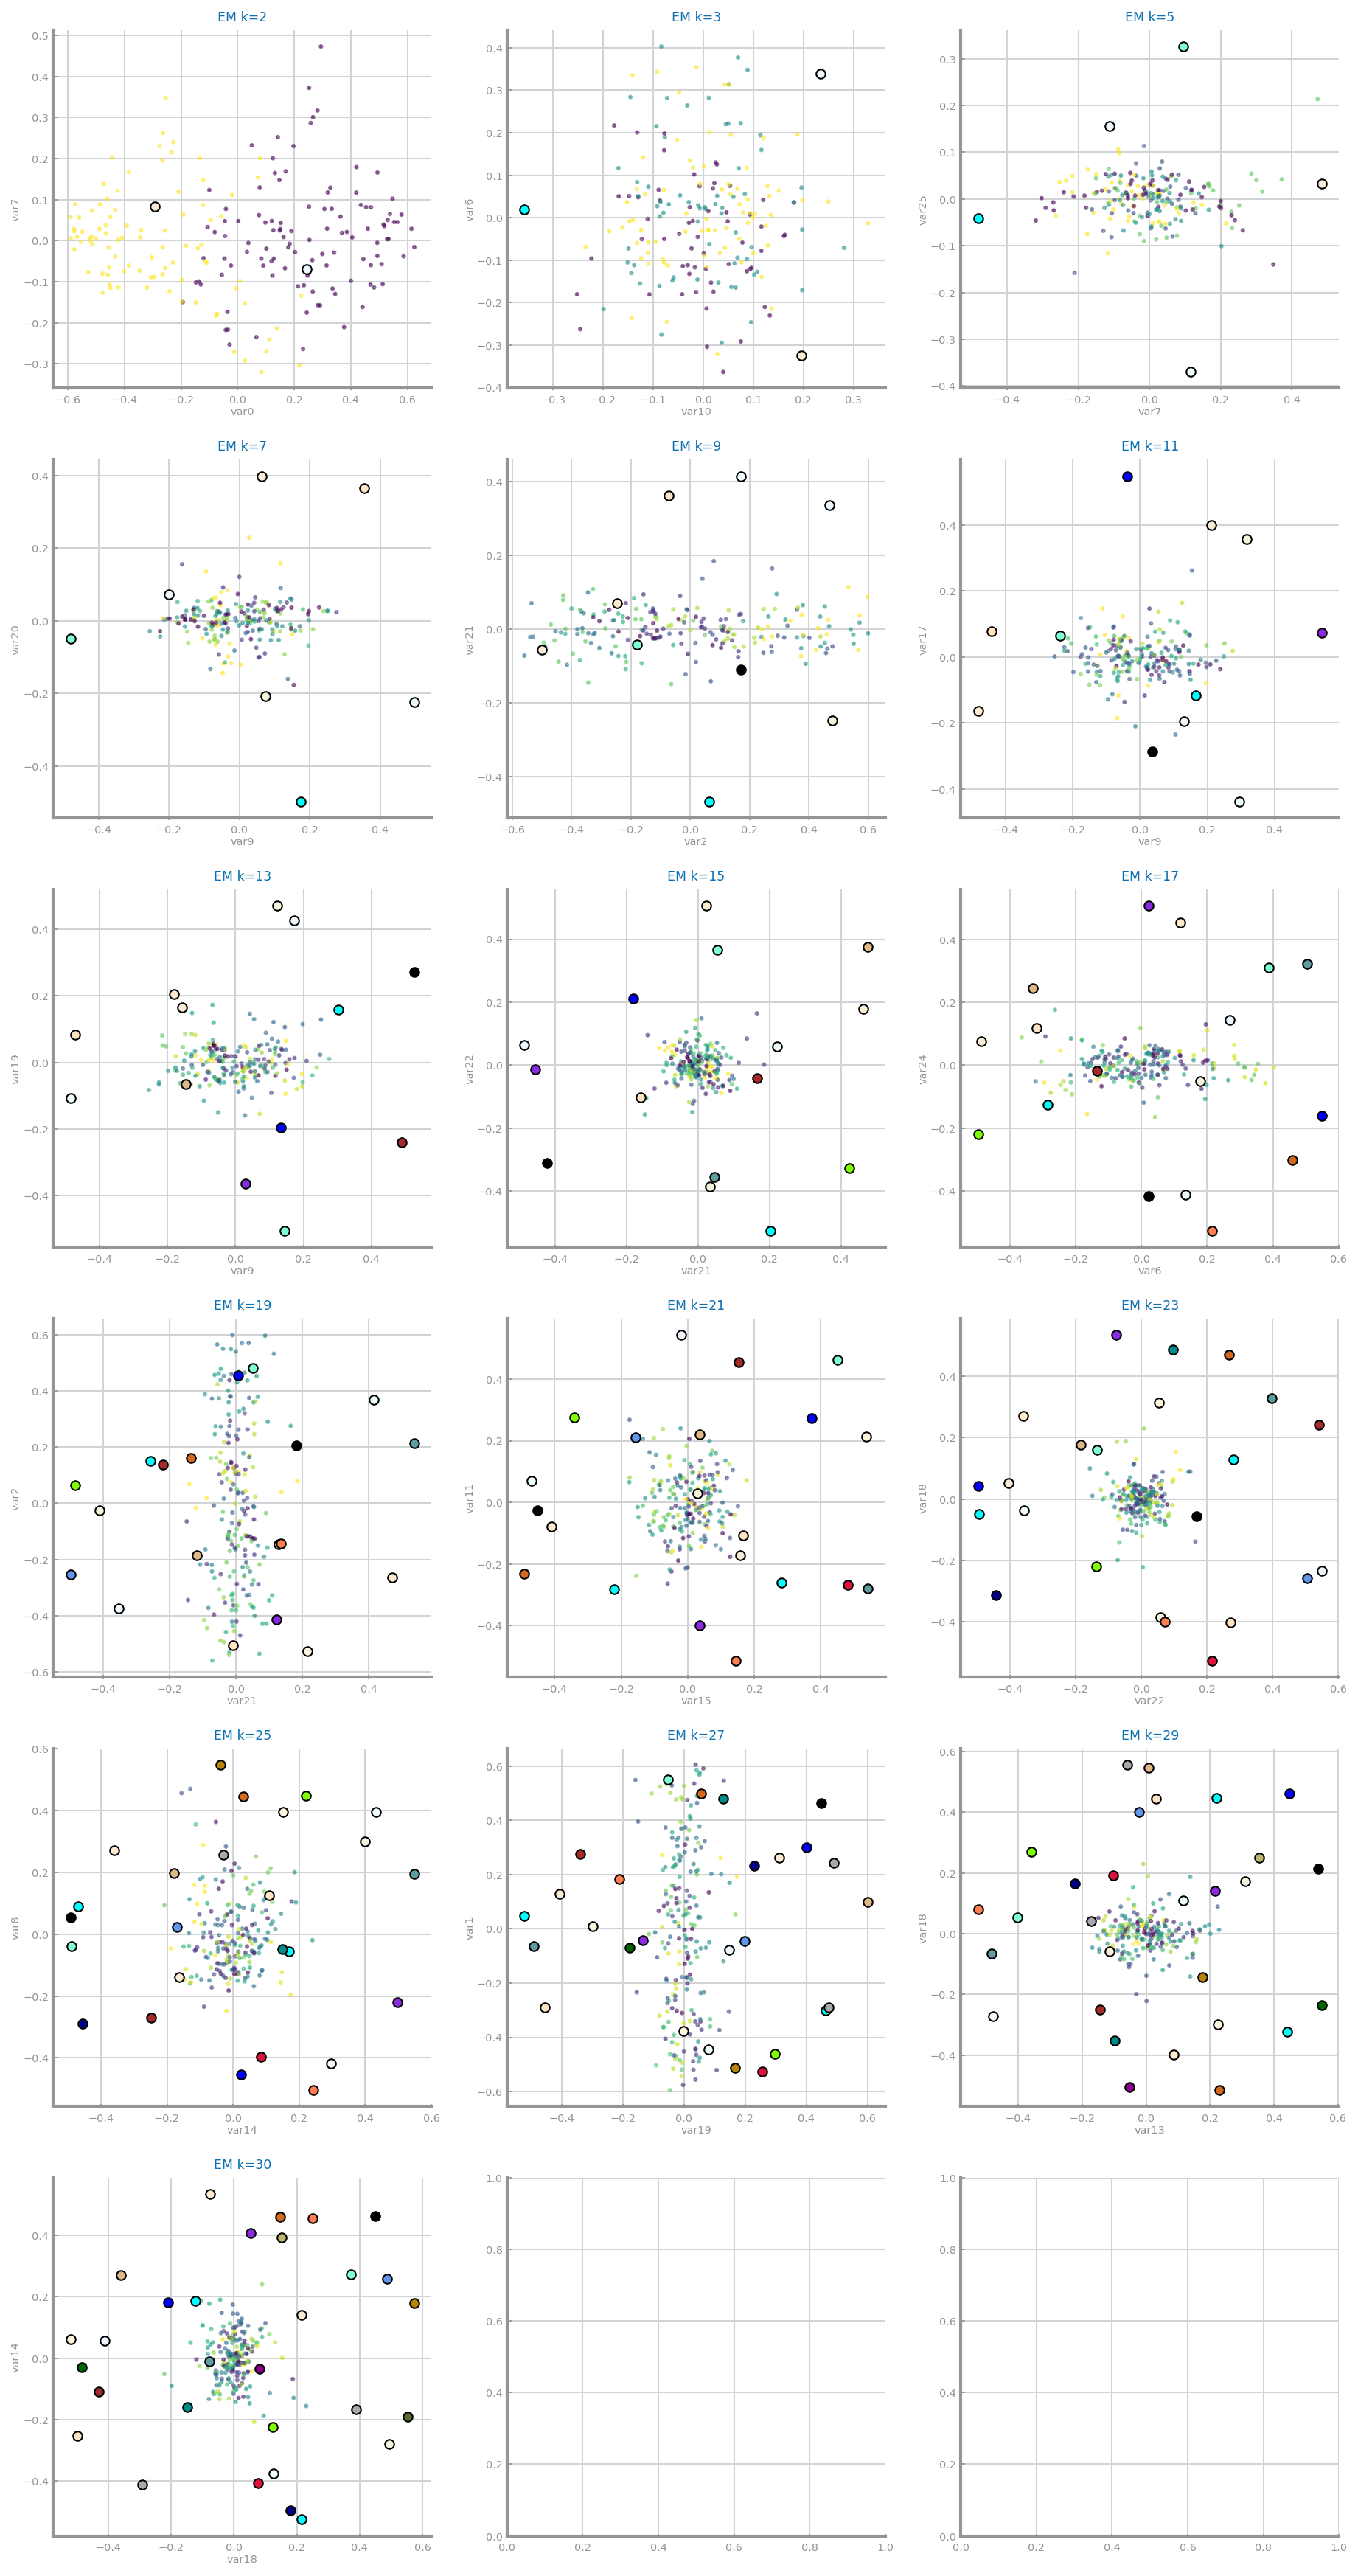

In [38]:
mse: list = []
sc: list = []
db: list = []
  
'''
for n in range(len(N_CLUSTERS)):
    fig, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
    i, j = 0, 0
    
    k = N_CLUSTERS[n]
    estimator = GaussianMixture(n_components=k)
    estimator.fit(data)
    labels = estimator.predict(data)
    
    mse.append(ds.compute_mse(data.values, labels, estimator.means_))
    sc.append(silhouette_score(data, labels))
    db.append(davies_bouldin_score(data, labels))
    
    print("K - " + str(n))
    
    for f1 in range (len(data.columns)):
        for f2 in range(f1+1, len(data.columns)): 
            ds.plot_clusters(data, f2, f1, labels.astype(float), estimator.means_, k,
                     f'EM k={k}', ax=axs[i,j])
            
            i, j = (i + 1, 0) if (j+1) % cols == 0 else (i, j + 1)    
    plt.show()
'''

rows, cols = ds.choose_grid(len(N_CLUSTERS))    
fig, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
i, j = 0, 0
for n in range(len(N_CLUSTERS)):
    k = N_CLUSTERS[n]
    
    print("K - " + str(k))

    estimator = GaussianMixture(n_components=k)
    estimator.fit(data)
    labels = estimator.predict(data)
    
    mse.append(ds.compute_mse(data.values, labels, estimator.means_))
    sc.append(silhouette_score(data, labels))
    db.append(davies_bouldin_score(data, labels))

    
    v1 = random.randint(0, len(data.columns)-1) # Random v1
    v2 = random.randint(0, len(data.columns)-1) # Random v2
    while(v1 == v2):
        v2 = random.randint(0, len(data.columns)-1)
    
    ds.plot_clusters(data, v2, v1, labels.astype(float), estimator.means_, k,
                     f'EM k={k}', ax=axs[i,j])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

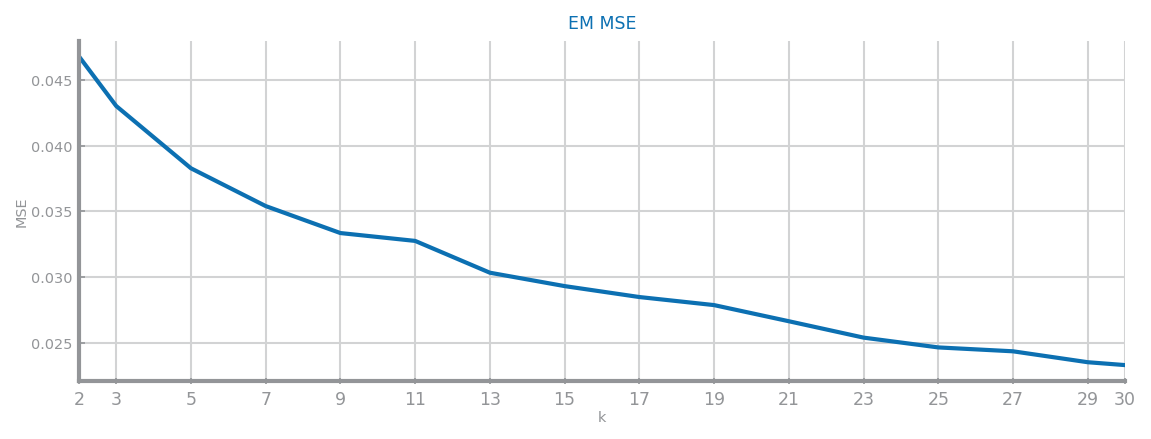

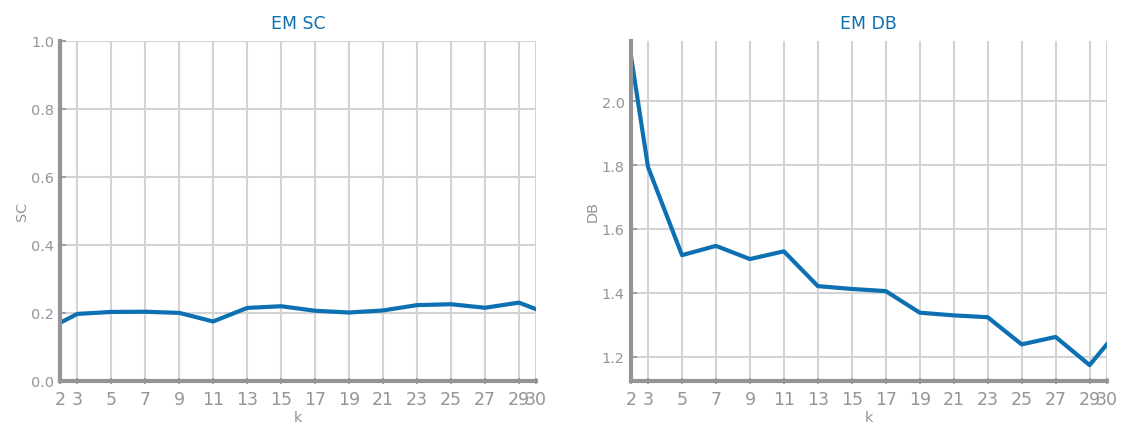

In [39]:
fig = plt.figure(figsize=(9,3))
ds.plot_line(N_CLUSTERS, mse, title='EM MSE', xlabel='k', ylabel='MSE')
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(9, 3), squeeze=False)
ds.plot_line(N_CLUSTERS, sc, title='EM SC', xlabel='k', ylabel='SC', ax=ax[0, 0], percentage=True)
ds.plot_line(N_CLUSTERS, db, title='EM DB', xlabel='k', ylabel='DB', ax=ax[0, 1], percentage=False)
plt.show()

"Yes, it is unlikely that binary data can be clustered satisfactorily. To see why, consider what happens as the K-Means algorithm processes cases.

For binary data, the Euclidean distance measure used by K-Means reduces to counting the number of variables on which two cases disagree. After the initial centers are chosen (which depends on the order of the cases), the centers are still binary data. For the first iteration, as the cases are compared to cluster means, they will always be at some integer distance from each of the centers. There will often be ties, and the case will be assigned to a cluster in an arbitrary manner. Using Euclidean distance (the only measure available to K-Means), it is impossible to overcome the symmetry and break the ties in any meaningful way.
"

### K-Means No Binary Data

In [40]:
data: pd.DataFrame = pd.read_csv('../../datasets/TO_TEST/HF/HR_S_FRFE_extra_outlierTrim_IQS_kpca.csv')
data.pop('DEATH_EVENT') #Remove target variable
numeric_vars = data.select_dtypes(include='number').columns

numeric_data = data
binary_data = data

for n in range(len(numeric_vars)):
    num_unique = len(list(set(data[numeric_vars[n]].values)))
    if num_unique == 2 or num_unique == 1:
        numeric_data = numeric_data.drop(columns=[data.columns[n]], axis=1) #Remove binary columns
    else:
        binary_data = binary_data.drop(columns=[data.columns[n]], axis=1) #Remove non-binary columns

print(numeric_data.head())
data = numeric_data

N_CLUSTERS = [2, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 30]
rows, cols = (3,4)

     Eigen0    Eigen1    Eigen2    Eigen3    Eigen4    Eigen5    Eigen6  \
0  0.564778 -0.189120 -0.219581  0.393657  0.096067  0.059295  0.377250   
1  0.534034 -0.405575 -0.118956  0.207494  0.032992  0.201419  0.314307   
2  0.335308 -0.519177  0.069034  0.201221 -0.001872  0.423481 -0.028161   
3  0.530429 -0.234215 -0.226850  0.380248  0.109953  0.133029  0.403090   
4  0.294247  0.363642  0.453452  0.125573  0.071957  0.144265 -0.213950   

     Eigen7    Eigen8    Eigen9  ...   Eigen16   Eigen17   Eigen18   Eigen19  \
0  0.045296  0.089450  0.023751  ... -0.213628 -0.086720  0.010182 -0.027243   
1  0.004172 -0.096490  0.006132  ... -0.043115  0.009072  0.044144 -0.060758   
2 -0.116500 -0.037716 -0.095560  ...  0.102866 -0.128552  0.057135 -0.007520   
3  0.050419 -0.003546  0.071096  ... -0.208262 -0.011586  0.057518 -0.154887   
4  0.472773  0.099680 -0.046119  ...  0.092886 -0.136184 -0.011309  0.016092   

    Eigen20   Eigen21   Eigen22   Eigen23   Eigen24   Eigen25  
0  0

K - 2
K - 3
K - 5
K - 7
K - 9
K - 11
K - 13
K - 15
K - 17
K - 19
K - 21
K - 23
K - 25
K - 27
K - 29
K - 30


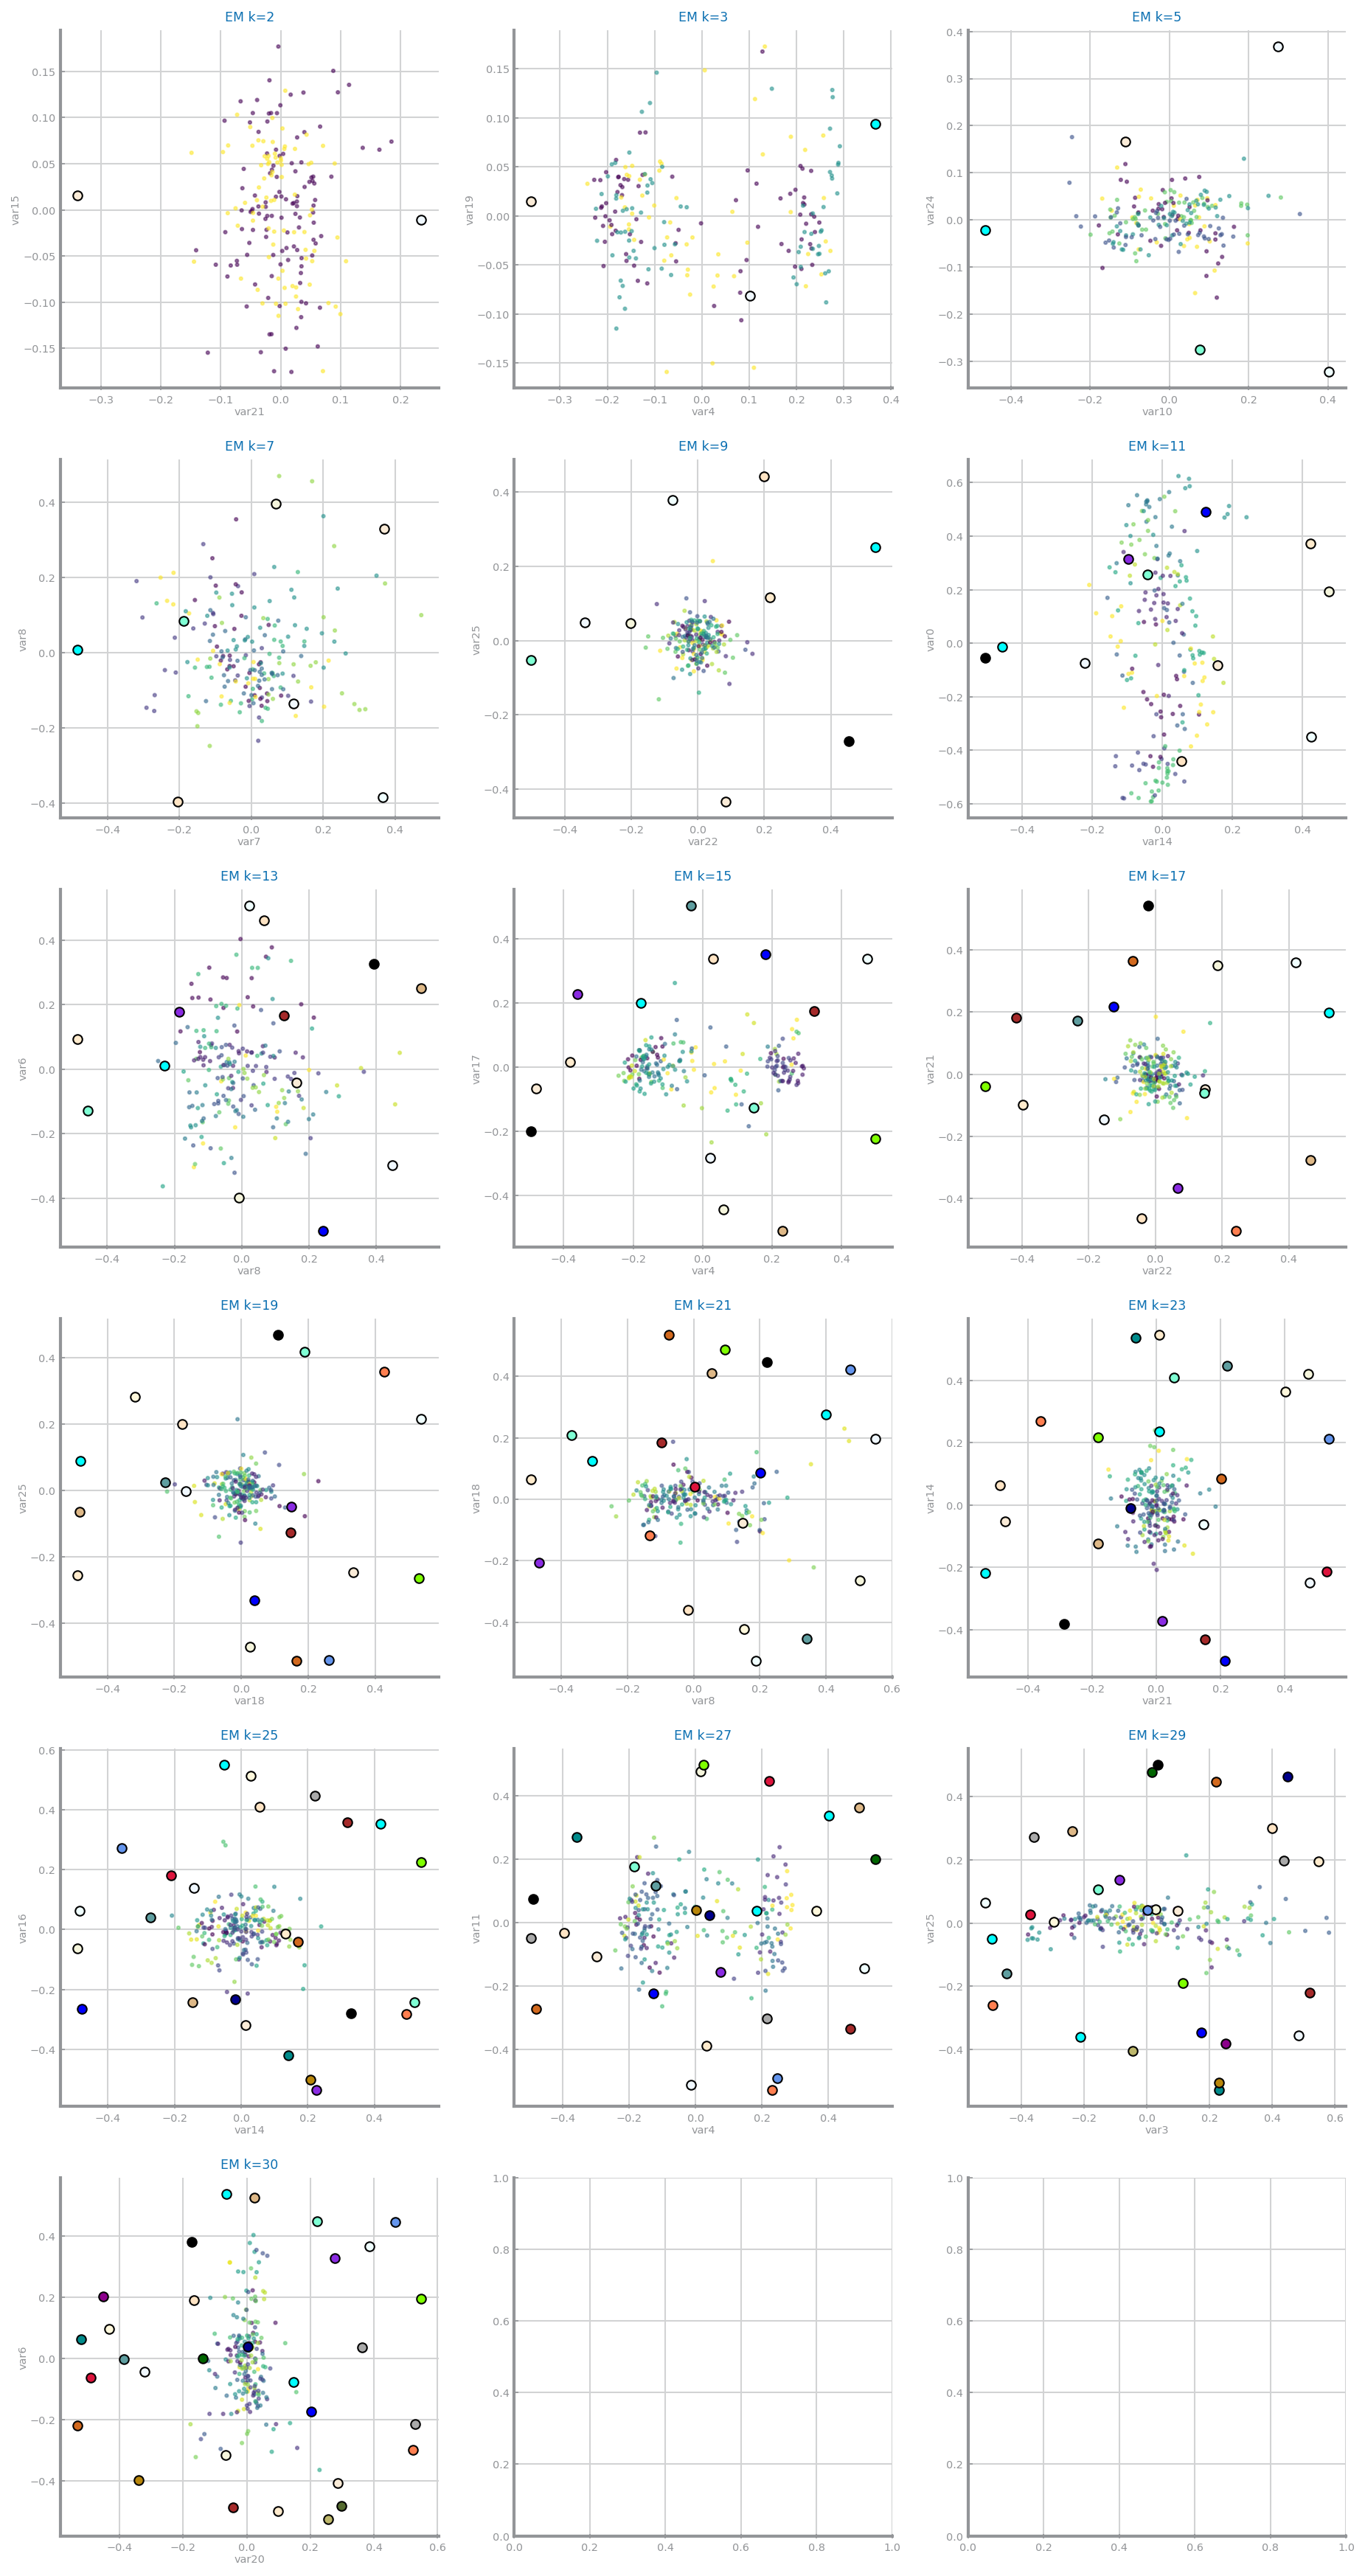

In [41]:
mse: list = []
sc: list = []
db: list = []

'''
for n in range(len(N_CLUSTERS)):
    fig, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
    i, j = 0, 0
    
    k = N_CLUSTERS[n]
    estimator = GaussianMixture(n_components=k)
    estimator.fit(data)
    labels = estimator.predict(data)
    
    mse.append(ds.compute_mse(data.values, labels, estimator.means_))
    sc.append(silhouette_score(data, labels))
    db.append(davies_bouldin_score(data, labels))
    
    print("K - " + str(n))
    
    for f1 in range (len(data.columns)):
        for f2 in range(f1+1, len(data.columns)): 
            ds.plot_clusters(data, f2, f1, labels.astype(float), estimator.means_, k,
                     f'EM k={k}', ax=axs[i,j])
            
            i, j = (i + 1, 0) if (j+1) % cols == 0 else (i, j + 1)    
    plt.show()
'''

rows, cols = ds.choose_grid(len(N_CLUSTERS))    
fig, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
i, j = 0, 0
for n in range(len(N_CLUSTERS)):
    k = N_CLUSTERS[n]
    
    print("K - " + str(k))

    estimator = GaussianMixture(n_components=k)
    estimator.fit(data)
    labels = estimator.predict(data)
    
    mse.append(ds.compute_mse(data.values, labels, estimator.means_))
    sc.append(silhouette_score(data, labels))
    db.append(davies_bouldin_score(data, labels))

    
    v1 = random.randint(0, len(data.columns)-1) # Random v1
    v2 = random.randint(0, len(data.columns)-1) # Random v2
    while(v1 == v2):
        v2 = random.randint(0, len(data.columns)-1)
    
    ds.plot_clusters(data, v2, v1, labels.astype(float), estimator.means_, k,
                     f'EM k={k}', ax=axs[i,j])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

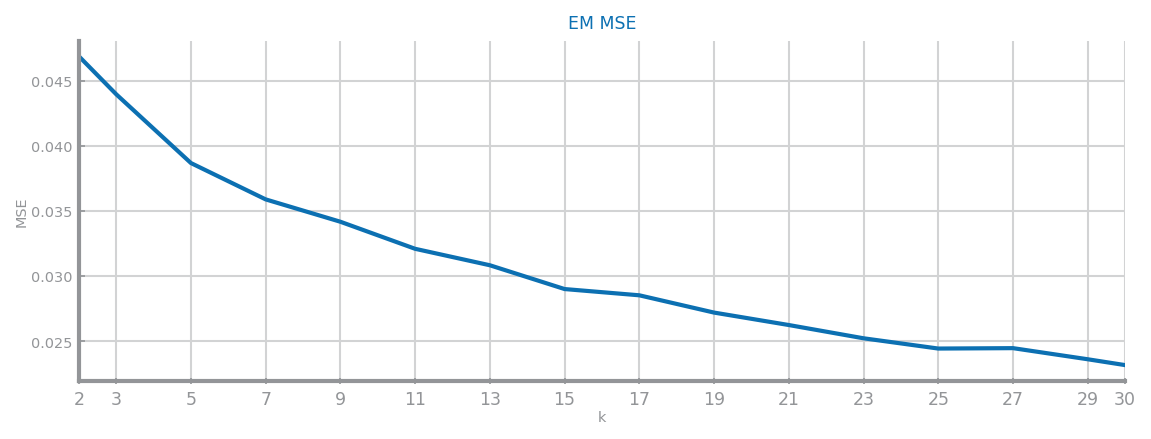

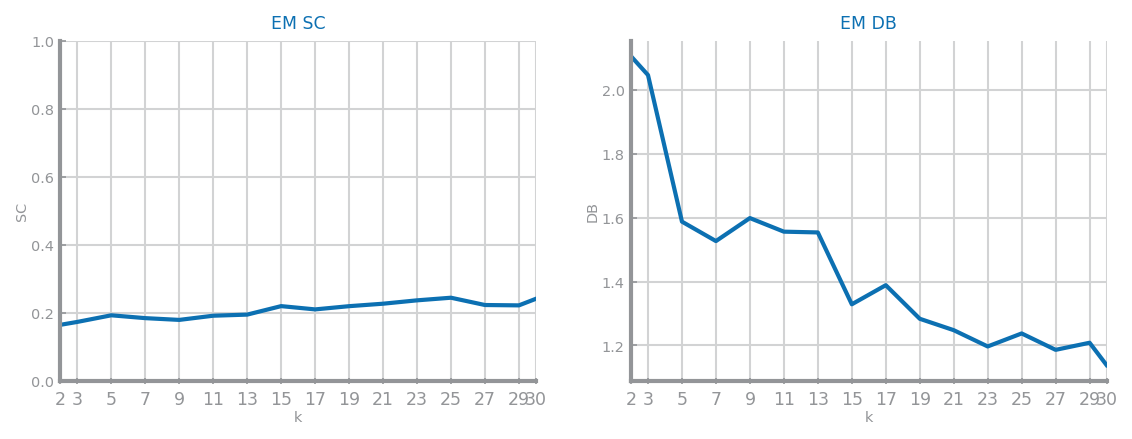

In [42]:
fig = plt.figure(figsize=(9,3))
ds.plot_line(N_CLUSTERS, mse, title='EM MSE', xlabel='k', ylabel='MSE')
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(9, 3), squeeze=False)
ds.plot_line(N_CLUSTERS, sc, title='EM SC', xlabel='k', ylabel='SC', ax=ax[0, 0], percentage=True)
ds.plot_line(N_CLUSTERS, db, title='EM DB', xlabel='k', ylabel='DB', ax=ax[0, 1], percentage=False)
plt.show()